<a href="https://colab.research.google.com/github/pandurangpatil/erav4-backpropbay/blob/assign-05/session5-ass/Session-05-01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


CODE BLOCK: 3

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1407,), (0.4081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1407,), (0.4081,))
    ])

CODE BLOCK: 4

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=train_transforms)

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 452kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.19MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 13.0MB/s]


CODE BLOCK: 5

In [5]:
batch_size = 64

train_kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 0, 'pin_memory': True}
test_kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 0, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **train_kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **test_kwargs)


CODE BLOCK: 6

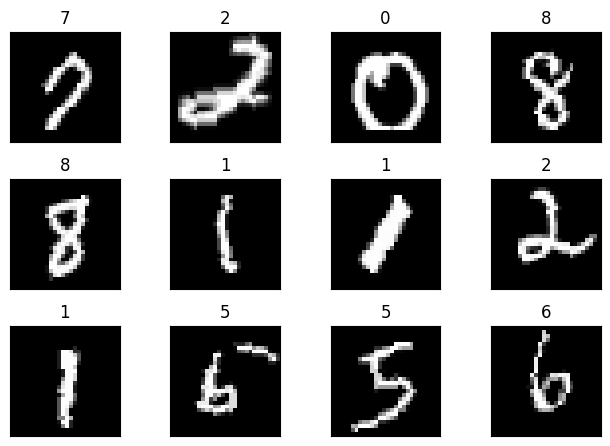

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [8]:

from tqdm import tqdm

def GetCorrectPredCount(pPrediction, pLabels):
  return pPrediction.argmax(dim=1).eq(pLabels).sum().item()

def train(model, device, train_loader, optimizer, criterion):
  model.train()
  pbar = tqdm(train_loader)

  train_loss = 0
  correct = 0
  processed = 0

  for batch_idx, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()

    # Predict
    pred = model(data)

    # Calculate loss
    loss = criterion(pred, target)
    train_loss+=loss.item()

    # Backpropagation
    loss.backward()
    optimizer.step()

    correct += GetCorrectPredCount(pred, target)
    processed += len(data)

    pbar.set_description(desc= f'Train: Loss={loss.item():0.4f} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')

  train_acc.append(100*correct/processed)
  train_losses.append(train_loss/len(train_loader))

def test(model, device, test_loader, criterion):
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)

            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss

            correct += GetCorrectPredCount(output, target)


    test_loss /= len(test_loader.dataset)
    test_acc.append(100. * correct / len(test_loader.dataset))
    test_losses.append(test_loss)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))



CODE BLOCK: 7

Epoch 1


Train: Loss=0.7229 Batch_id=117 Accuracy=50.08: 100%|██████████| 118/118 [00:36<00:00,  3.26it/s]


Test set: Average loss: 0.0011, Accuracy: 48999/60000 (81.67%)

Epoch 2


Train: Loss=0.5688 Batch_id=117 Accuracy=85.27: 100%|██████████| 118/118 [00:36<00:00,  3.20it/s]


Test set: Average loss: 0.0008, Accuracy: 52255/60000 (87.09%)

Epoch 3


Train: Loss=0.4689 Batch_id=117 Accuracy=88.17: 100%|██████████| 118/118 [00:36<00:00,  3.24it/s]


Test set: Average loss: 0.0007, Accuracy: 53537/60000 (89.23%)

Epoch 4


Train: Loss=0.3023 Batch_id=117 Accuracy=90.45: 100%|██████████| 118/118 [00:36<00:00,  3.21it/s]


Test set: Average loss: 0.0005, Accuracy: 54959/60000 (91.60%)

Epoch 5


Train: Loss=0.2646 Batch_id=117 Accuracy=92.45: 100%|██████████| 118/118 [00:36<00:00,  3.23it/s]


Test set: Average loss: 0.0004, Accuracy: 55923/60000 (93.20%)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
         MaxPool2d-2            [-1, 8, 14, 14]               0
            Conv2d-3            [-1, 4, 14, 14]              36
            Conv2d-4            [-1, 8, 14, 14]             296
         MaxPool2d-5              [-1, 8, 7, 7]               0
            Conv2d-6              [-1, 2, 7, 7]              18
            Conv2d-7              [-1, 4, 7, 7]              76
            Linear-8                   [-1, 30]           5,910
            Linear-9                   [-1, 10]             310
Total params: 6,726
Trainable params: 6,726
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.08
Params size (MB): 0.03
Estimated Total

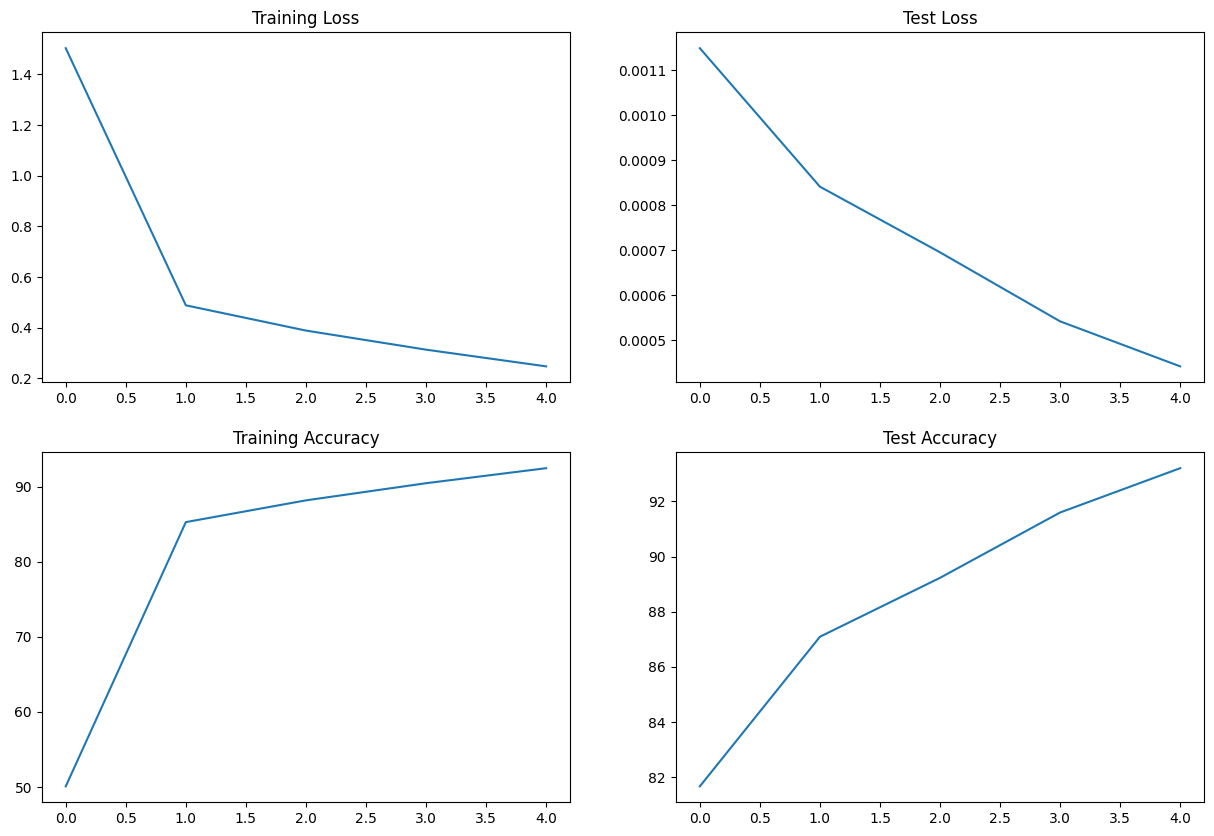

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        #28X28
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1) # 28X28X8
        self.pool1 = nn.MaxPool2d(2, 2) # 14X14X8
        self.conv2 = nn.Conv2d(8, 4, kernel_size=1) # 14X14X4
        self.conv3 = nn.Conv2d(4, 8, kernel_size=3, padding=1) # 14X14X8
        self.pool2 = nn.MaxPool2d(2, 2) # 7X7X8
        self.conv4 = nn.Conv2d(8, 2, kernel_size=1) # 7X7X4
        self.conv5 = nn.Conv2d(2, 4, kernel_size=3, padding=1) # 7X7X4
        self.fc1 = nn.Linear(4*7*7, 30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x), 2)
        x = self.pool1(x)
        x = self.conv2(x)
        x = F.relu(self.conv3(x), 2)
        x = self.pool2(x)
        x = self.conv4(x)
        x = F.relu(self.conv5(x), 2)
        x = x.view(-1,4*7*7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 5

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  #scheduler.step()

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Epoch 1


Train: Loss=0.3917 Batch_id=117 Accuracy=57.93: 100%|██████████| 118/118 [00:52<00:00,  2.25it/s]


Test set: Average loss: 0.0009, Accuracy: 51808/60000 (86.35%)

Epoch 2


Train: Loss=0.3186 Batch_id=117 Accuracy=89.60: 100%|██████████| 118/118 [00:39<00:00,  3.01it/s]


Test set: Average loss: 0.0006, Accuracy: 54778/60000 (91.30%)

Epoch 3


Train: Loss=0.1942 Batch_id=117 Accuracy=92.59: 100%|██████████| 118/118 [00:38<00:00,  3.06it/s]


Test set: Average loss: 0.0004, Accuracy: 55975/60000 (93.29%)

Epoch 4


Train: Loss=0.1714 Batch_id=117 Accuracy=94.00: 100%|██████████| 118/118 [00:38<00:00,  3.07it/s]


Test set: Average loss: 0.0004, Accuracy: 56475/60000 (94.12%)

Epoch 5


Train: Loss=0.1789 Batch_id=117 Accuracy=94.76: 100%|██████████| 118/118 [00:38<00:00,  3.03it/s]


Test set: Average loss: 0.0003, Accuracy: 57187/60000 (95.31%)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
         MaxPool2d-2            [-1, 8, 14, 14]               0
            Conv2d-3           [-1, 16, 14, 14]           1,168
         MaxPool2d-4             [-1, 16, 7, 7]               0
            Conv2d-5              [-1, 4, 7, 7]              68
            Conv2d-6              [-1, 8, 7, 7]             296
            Linear-7                   [-1, 30]          11,790
            Linear-8                   [-1, 10]             310
Total params: 13,712
Trainable params: 13,712
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.09
Params size (MB): 0.05
Estimated Total Size (MB): 0.15
---------------------------------------------

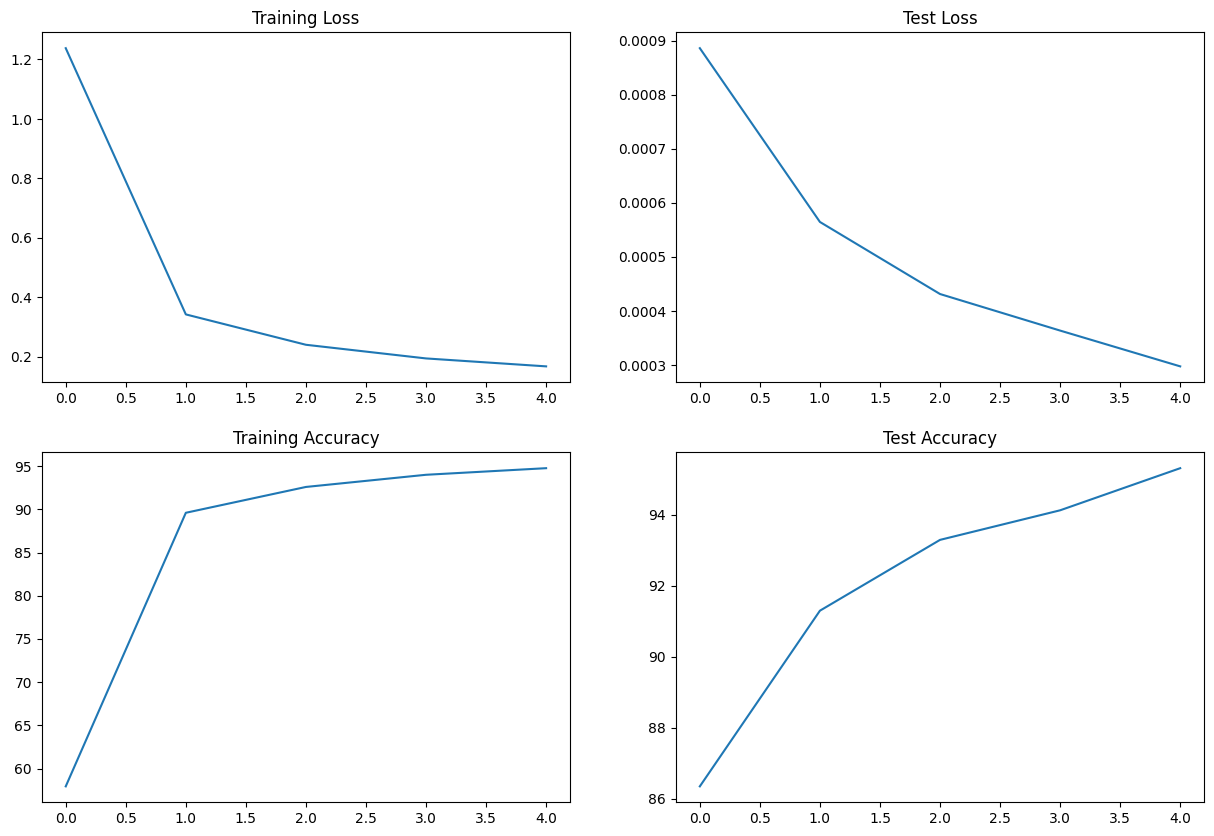

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        #28X28
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1) # 28X28X8
        self.pool1 = nn.MaxPool2d(2, 2) # 14X14X8
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1) # 14X14X16
        self.pool2 = nn.MaxPool2d(2, 2) # 7X7X16
        self.conv4 = nn.Conv2d(16, 4, kernel_size=1) # 7X7X4
        self.conv5 = nn.Conv2d(4, 8, kernel_size=3, padding=1) # 7X7X8
        self.fc1 = nn.Linear(8*7*7, 30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x), 2)
        x = self.pool1(x)
        x = F.relu(self.conv2(x), 2)
        x = self.pool2(x)
        x = self.conv4(x)
        x = F.relu(self.conv5(x), 2)
        x = x.view(-1,8*7*7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 5

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  #scheduler.step()

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Epoch 1


Train: Loss=0.5821 Batch_id=117 Accuracy=60.01: 100%|██████████| 118/118 [00:47<00:00,  2.47it/s]


Test set: Average loss: 0.0009, Accuracy: 51623/60000 (86.04%)

Epoch 2


Train: Loss=0.1053 Batch_id=117 Accuracy=89.79: 100%|██████████| 118/118 [00:38<00:00,  3.04it/s]


Test set: Average loss: 0.0005, Accuracy: 55317/60000 (92.19%)

Epoch 3


Train: Loss=0.1599 Batch_id=117 Accuracy=93.54: 100%|██████████| 118/118 [00:38<00:00,  3.05it/s]


Test set: Average loss: 0.0003, Accuracy: 56782/60000 (94.64%)

Epoch 4


Train: Loss=0.0797 Batch_id=117 Accuracy=95.01: 100%|██████████| 118/118 [00:39<00:00,  3.00it/s]


Test set: Average loss: 0.0003, Accuracy: 57375/60000 (95.62%)

Epoch 5


Train: Loss=0.1040 Batch_id=117 Accuracy=95.80: 100%|██████████| 118/118 [00:38<00:00,  3.03it/s]


Test set: Average loss: 0.0002, Accuracy: 57721/60000 (96.20%)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
         MaxPool2d-2            [-1, 8, 14, 14]               0
            Conv2d-3           [-1, 16, 14, 14]           1,168
         MaxPool2d-4             [-1, 16, 7, 7]               0
            Conv2d-5              [-1, 8, 7, 7]             136
            Conv2d-6             [-1, 16, 5, 5]           1,168
            Linear-7                   [-1, 30]          12,030
            Linear-8                   [-1, 10]             310
Total params: 14,892
Trainable params: 14,892
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.10
Params size (MB): 0.06
Estimated Total Size (MB): 0.16
---------------------------------------------

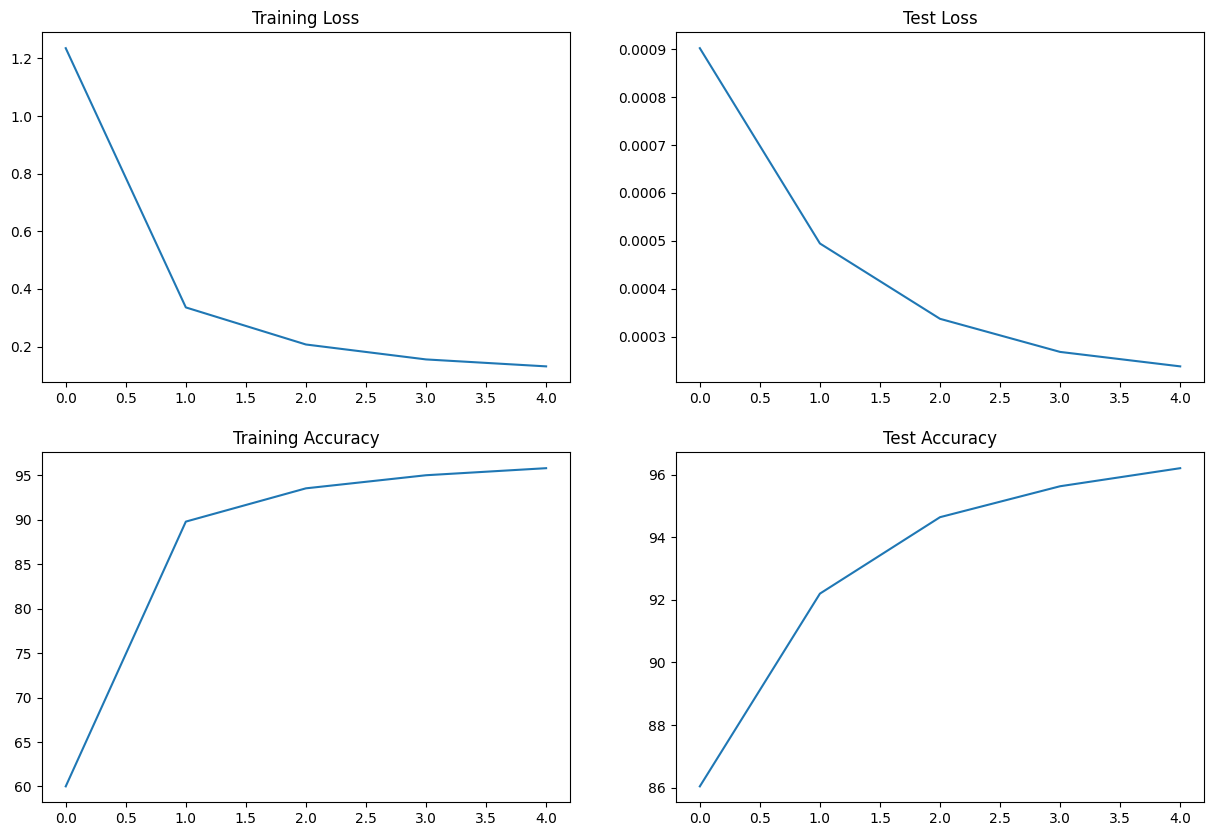

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        #28X28
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1) # 28X28X8
        self.pool1 = nn.MaxPool2d(2, 2) # 14X14X8
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1) # 14X14X16
        self.pool2 = nn.MaxPool2d(2, 2) # 7X7X16
        self.conv4 = nn.Conv2d(16, 8, kernel_size=1) # 7X7X4
        self.conv5 = nn.Conv2d(8, 16, kernel_size=3) # 5X5X16
        self.fc1 = nn.Linear(16*5*5, 30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x), 2)
        x = self.pool1(x)
        x = F.relu(self.conv2(x), 2)
        x = self.pool2(x)
        x = self.conv4(x)
        x = F.relu(self.conv5(x), 2)
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 5

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  #scheduler.step()

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Epoch 1


Train: Loss=0.3597 Batch_id=117 Accuracy=66.69: 100%|██████████| 118/118 [01:03<00:00,  1.87it/s]


Test set: Average loss: 0.0007, Accuracy: 53312/60000 (88.85%)

Epoch 2


Train: Loss=0.1848 Batch_id=117 Accuracy=91.68: 100%|██████████| 118/118 [00:55<00:00,  2.13it/s]


Test set: Average loss: 0.0004, Accuracy: 56455/60000 (94.09%)

Epoch 3


Train: Loss=0.1070 Batch_id=117 Accuracy=94.96: 100%|██████████| 118/118 [00:55<00:00,  2.14it/s]


Test set: Average loss: 0.0003, Accuracy: 57447/60000 (95.75%)

Epoch 4


Train: Loss=0.0389 Batch_id=117 Accuracy=96.03: 100%|██████████| 118/118 [00:55<00:00,  2.14it/s]


Test set: Average loss: 0.0002, Accuracy: 57869/60000 (96.45%)

Epoch 5


Train: Loss=0.0901 Batch_id=117 Accuracy=96.76: 100%|██████████| 118/118 [00:55<00:00,  2.13it/s]


Test set: Average loss: 0.0002, Accuracy: 58294/60000 (97.16%)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
            Conv2d-2           [-1, 16, 28, 28]           1,168
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4           [-1, 16, 14, 14]           2,320
         MaxPool2d-5             [-1, 16, 7, 7]               0
            Conv2d-6              [-1, 8, 7, 7]             136
            Conv2d-7             [-1, 16, 5, 5]           1,168
            Linear-8                   [-1, 30]          12,030
            Linear-9                   [-1, 10]             310
Total params: 17,212
Trainable params: 17,212
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.20
Params size (MB): 0.07
Estimated Tot

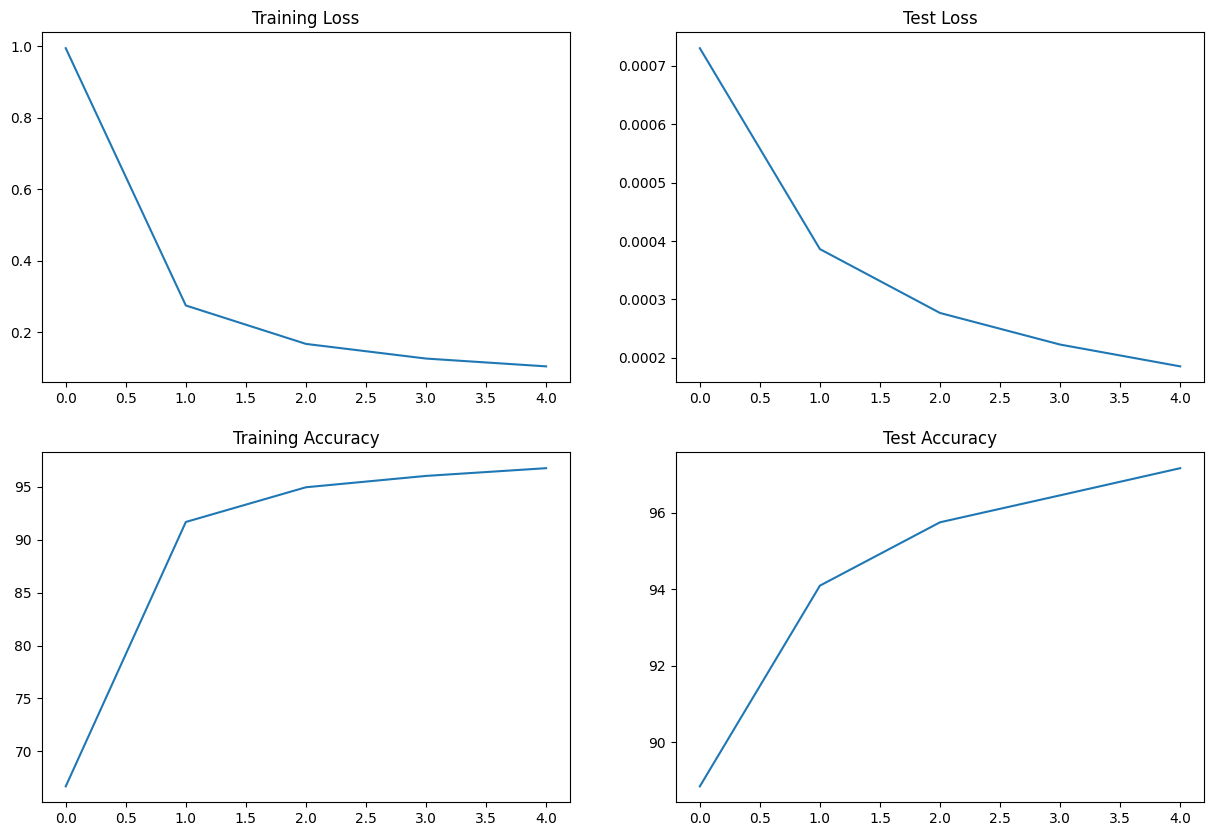

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        #28X28
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1) # 28X28X4
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1) # 28X28X16
        self.pool1 = nn.MaxPool2d(2, 2) # 14X14X16
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3, padding=1) # 14X14X16
        self.pool2 = nn.MaxPool2d(2, 2) # 7X7X16
        self.conv4 = nn.Conv2d(16, 8, kernel_size=1) # 7X7X4
        self.conv5 = nn.Conv2d(8, 16, kernel_size=3) # 5X5X16
        self.fc1 = nn.Linear(16*5*5, 30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x), 2)
        x = F.relu(self.conv2(x), 2)
        x = self.pool1(x)
        x = F.relu(self.conv3(x), 2)
        x = self.pool2(x)
        x = self.conv4(x)
        x = F.relu(self.conv5(x), 2)
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 5

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  #scheduler.step()

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Epoch 1


Train: Loss=0.4029 Batch_id=117 Accuracy=61.66: 100%|██████████| 118/118 [00:46<00:00,  2.56it/s]


Test set: Average loss: 0.0010, Accuracy: 50740/60000 (84.57%)

Epoch 2


Train: Loss=0.2916 Batch_id=117 Accuracy=89.38: 100%|██████████| 118/118 [00:35<00:00,  3.28it/s]


Test set: Average loss: 0.0005, Accuracy: 55089/60000 (91.81%)

Epoch 3


Train: Loss=0.1653 Batch_id=117 Accuracy=93.44: 100%|██████████| 118/118 [00:36<00:00,  3.26it/s]


Test set: Average loss: 0.0004, Accuracy: 56572/60000 (94.29%)

Epoch 4


Train: Loss=0.1828 Batch_id=117 Accuracy=94.92: 100%|██████████| 118/118 [00:36<00:00,  3.25it/s]


Test set: Average loss: 0.0003, Accuracy: 57231/60000 (95.39%)

Epoch 5


Train: Loss=0.0946 Batch_id=117 Accuracy=95.66: 100%|██████████| 118/118 [00:36<00:00,  3.27it/s]


Test set: Average loss: 0.0002, Accuracy: 57658/60000 (96.10%)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
         MaxPool2d-2            [-1, 8, 14, 14]               0
            Conv2d-3           [-1, 16, 14, 14]           1,168
         MaxPool2d-4             [-1, 16, 7, 7]               0
            Conv2d-5              [-1, 4, 7, 7]              68
            Conv2d-6              [-1, 8, 5, 5]             296
            Conv2d-7             [-1, 16, 3, 3]           1,168
            Linear-8                   [-1, 50]           7,250
            Linear-9                   [-1, 10]             510
Total params: 10,540
Trainable params: 10,540
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.09
Params size (MB): 0.04
Estimated Tot

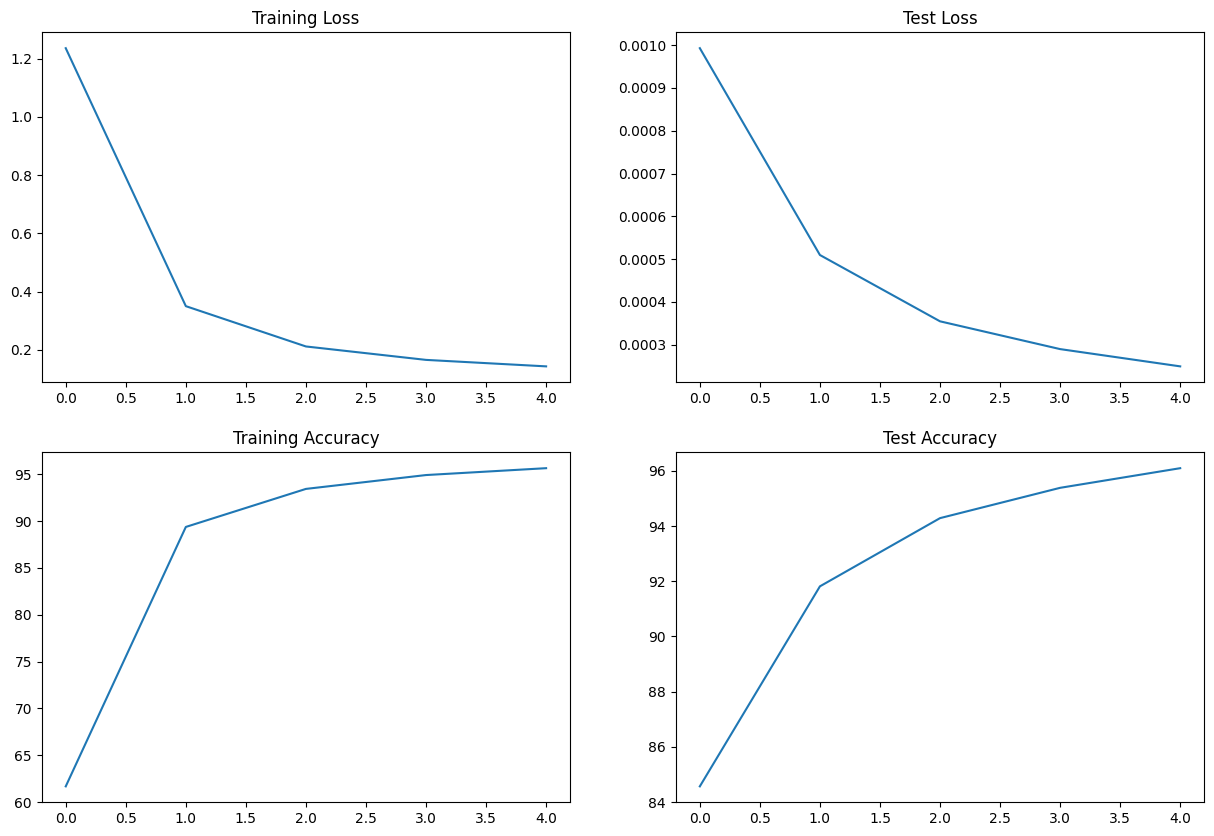

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        #28X28
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1) # 28X28X8
        self.pool1 = nn.MaxPool2d(2, 2) # 14X14X8
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1) # 14X14X16
        self.pool2 = nn.MaxPool2d(2, 2) # 7X7X16
        self.conv4 = nn.Conv2d(16, 4, kernel_size=1) # 7X7X4
        self.conv5 = nn.Conv2d(4, 8, kernel_size=3) # 5X5X8
        self.conv6 = nn.Conv2d(8, 16, kernel_size=3) # 3X3X16
        self.fc1 = nn.Linear(16*3*3, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x), 2)
        x = self.pool1(x)
        x = F.relu(self.conv2(x), 2)
        x = self.pool2(x)
        x = self.conv4(x)
        x = F.relu(self.conv5(x), 2)
        x = F.relu(self.conv6(x), 2)
        x = x.view(-1,16*3*3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 5

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  #scheduler.step()

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Epoch 1


Train: Loss=0.4510 Batch_id=117 Accuracy=60.79: 100%|██████████| 118/118 [00:46<00:00,  2.56it/s]


Test set: Average loss: 0.0008, Accuracy: 52019/60000 (86.70%)

Epoch 2


Train: Loss=0.0963 Batch_id=117 Accuracy=90.58: 100%|██████████| 118/118 [00:36<00:00,  3.27it/s]


Test set: Average loss: 0.0004, Accuracy: 55854/60000 (93.09%)

Epoch 3


Train: Loss=0.0997 Batch_id=117 Accuracy=94.14: 100%|██████████| 118/118 [00:36<00:00,  3.28it/s]


Test set: Average loss: 0.0003, Accuracy: 57086/60000 (95.14%)

Epoch 4


Train: Loss=0.2205 Batch_id=117 Accuracy=95.54: 100%|██████████| 118/118 [00:35<00:00,  3.30it/s]


Test set: Average loss: 0.0003, Accuracy: 57478/60000 (95.80%)

Epoch 5


Train: Loss=0.1045 Batch_id=117 Accuracy=96.17: 100%|██████████| 118/118 [00:35<00:00,  3.30it/s]


Test set: Average loss: 0.0002, Accuracy: 57815/60000 (96.36%)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
         MaxPool2d-2            [-1, 8, 14, 14]               0
            Conv2d-3           [-1, 16, 14, 14]           1,168
         MaxPool2d-4             [-1, 16, 7, 7]               0
            Conv2d-5              [-1, 8, 7, 7]             136
            Conv2d-6             [-1, 16, 5, 5]           1,168
            Linear-7                   [-1, 40]          16,040
            Linear-8                   [-1, 10]             410
Total params: 19,002
Trainable params: 19,002
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.10
Params size (MB): 0.07
Estimated Total Size (MB): 0.17
---------------------------------------------

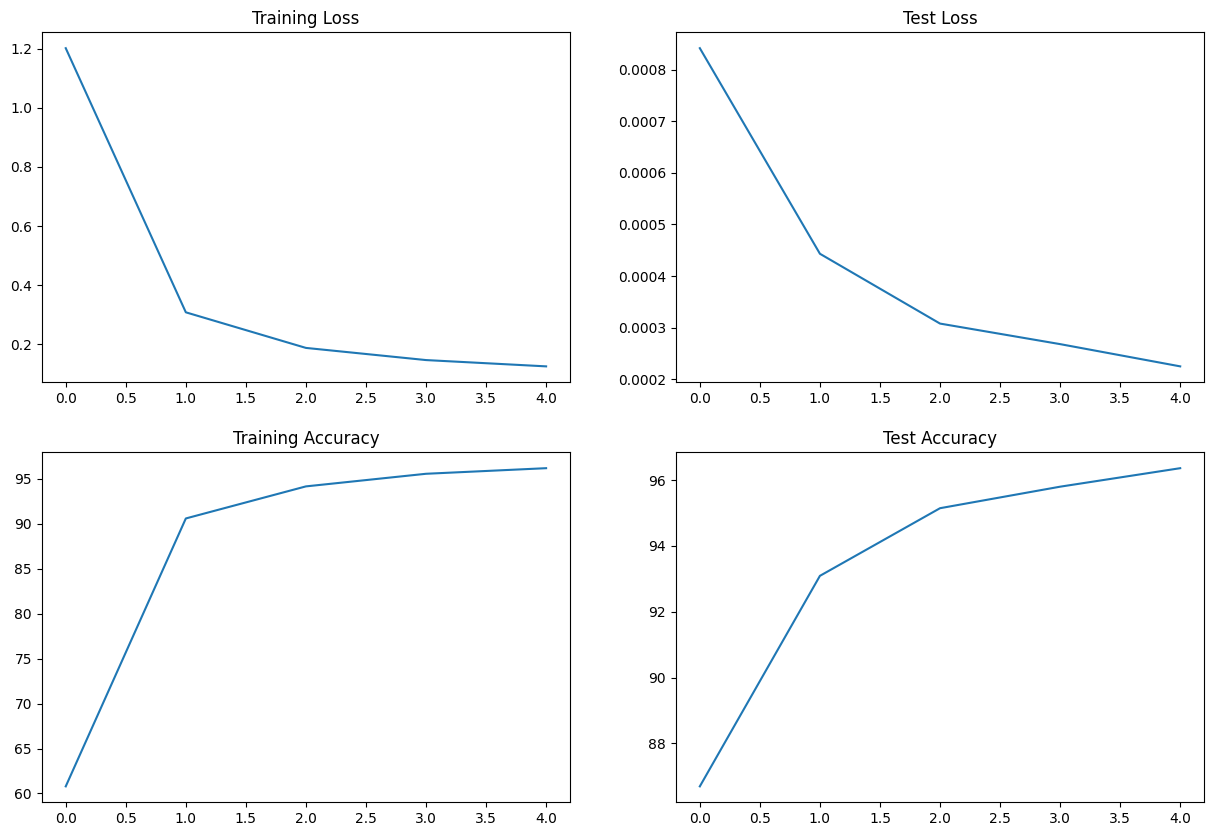

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        #28X28
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1) # 28X28X8
        self.pool1 = nn.MaxPool2d(2, 2) # 14X14X8
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1) # 14X14X16
        self.pool2 = nn.MaxPool2d(2, 2) # 7X7X16
        self.conv4 = nn.Conv2d(16, 8, kernel_size=1) # 7X7X4
        self.conv5 = nn.Conv2d(8, 16, kernel_size=3) # 5X5X16
        self.fc1 = nn.Linear(16*5*5, 40)
        self.fc2 = nn.Linear(40, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x), 2)
        x = self.pool1(x)
        x = F.relu(self.conv2(x), 2)
        x = self.pool2(x)
        x = self.conv4(x)
        x = F.relu(self.conv5(x), 2)
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 5

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  #scheduler.step()

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Epoch 1


Train: Loss=0.1972 Batch_id=117 Accuracy=82.88: 100%|██████████| 118/118 [00:48<00:00,  2.45it/s]


Test set: Average loss: 0.0003, Accuracy: 57025/60000 (95.04%)

Epoch 2


Train: Loss=0.0341 Batch_id=117 Accuracy=96.19: 100%|██████████| 118/118 [00:40<00:00,  2.88it/s]


Test set: Average loss: 0.0002, Accuracy: 58166/60000 (96.94%)

Epoch 3


Train: Loss=0.1477 Batch_id=117 Accuracy=97.26: 100%|██████████| 118/118 [00:41<00:00,  2.86it/s]


Test set: Average loss: 0.0002, Accuracy: 58540/60000 (97.57%)

Epoch 4


Train: Loss=0.2007 Batch_id=117 Accuracy=97.74: 100%|██████████| 118/118 [00:40<00:00,  2.90it/s]


Test set: Average loss: 0.0001, Accuracy: 58780/60000 (97.97%)

Epoch 5


Train: Loss=0.0393 Batch_id=117 Accuracy=98.02: 100%|██████████| 118/118 [00:41<00:00,  2.87it/s]


Test set: Average loss: 0.0001, Accuracy: 58859/60000 (98.10%)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
       BatchNorm2d-2            [-1, 8, 28, 28]              16
         MaxPool2d-3            [-1, 8, 14, 14]               0
            Conv2d-4           [-1, 16, 14, 14]           1,168
       BatchNorm2d-5           [-1, 16, 14, 14]              32
         MaxPool2d-6             [-1, 16, 7, 7]               0
            Conv2d-7              [-1, 8, 7, 7]             136
            Conv2d-8             [-1, 16, 5, 5]           1,168
       BatchNorm2d-9             [-1, 16, 5, 5]              32
           Linear-10                   [-1, 40]          16,040
           Linear-11                   [-1, 10]             410
Total params: 19,082
Trainable params: 19,082
Non-trainable params: 0
---------------------------------

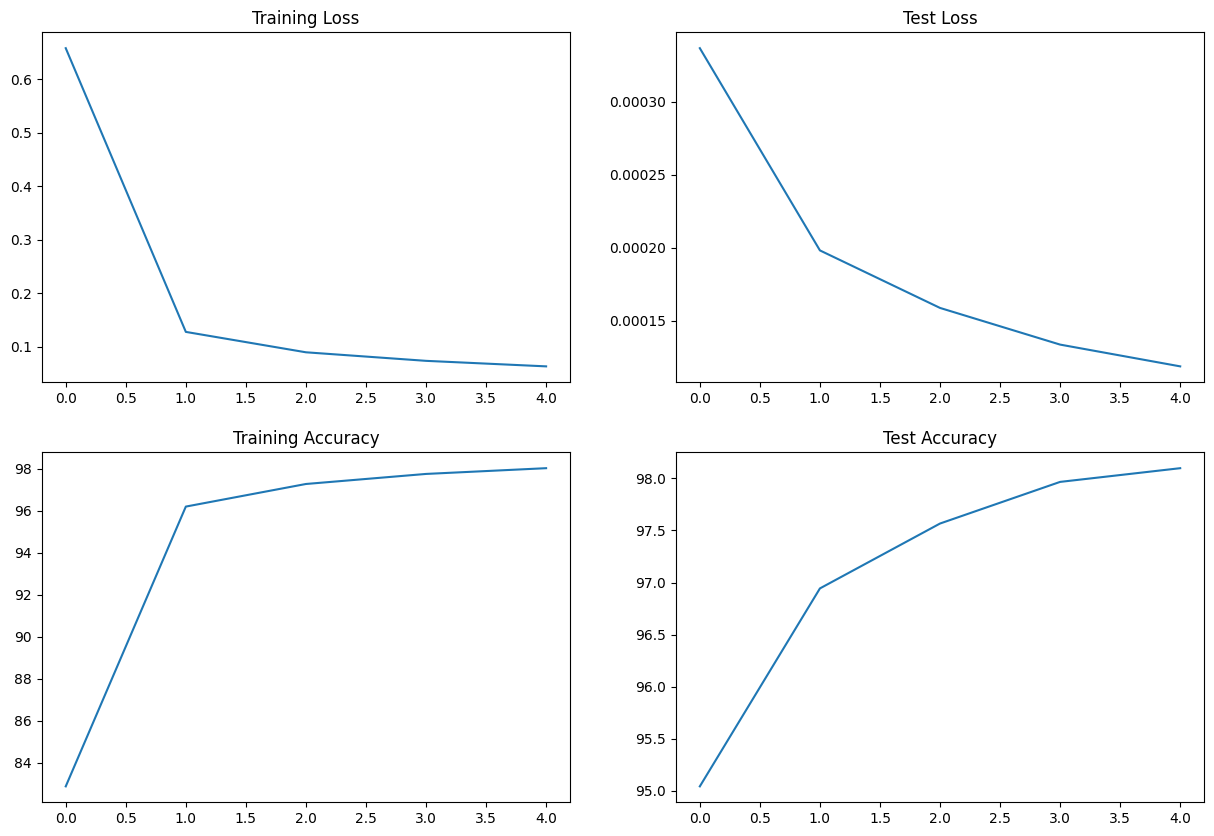

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        #28X28
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1) # 28X28X8
        self.bn1 = nn.BatchNorm2d(8)   # 28x28X8
        self.pool1 = nn.MaxPool2d(2, 2) # 14X14X8
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1) # 14X14X16
        self.bn2 = nn.BatchNorm2d(16)   # 14X14X6
        self.pool2 = nn.MaxPool2d(2, 2) # 7X7X16
        self.conv4 = nn.Conv2d(16, 8, kernel_size=1) # 7X7X4
        self.conv5 = nn.Conv2d(8, 16, kernel_size=3) # 5X5X16
        self.bn3 = nn.BatchNorm2d(16)   # 5X5X16
        self.fc1 = nn.Linear(16*5*5, 40)
        self.fc2 = nn.Linear(40, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)), 2)
        x = self.pool1(x)
        x = F.relu(self.bn2(self.conv2(x)), 2)
        x = self.pool2(x)
        x = self.conv4(x)
        x = F.relu(self.bn3(self.conv5(x)), 2)
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 5

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  #scheduler.step()

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Epoch 1


Train: Loss=0.2352 Batch_id=117 Accuracy=79.51: 100%|██████████| 118/118 [00:48<00:00,  2.42it/s]


Test set: Average loss: 0.0003, Accuracy: 57000/60000 (95.00%)

Epoch 2


Train: Loss=0.1593 Batch_id=117 Accuracy=92.11: 100%|██████████| 118/118 [00:41<00:00,  2.87it/s]


Test set: Average loss: 0.0002, Accuracy: 58031/60000 (96.72%)

Epoch 3


Train: Loss=0.1767 Batch_id=117 Accuracy=93.25: 100%|██████████| 118/118 [00:40<00:00,  2.94it/s]


Test set: Average loss: 0.0002, Accuracy: 58531/60000 (97.55%)

Epoch 4


Train: Loss=0.0862 Batch_id=117 Accuracy=93.82: 100%|██████████| 118/118 [00:40<00:00,  2.90it/s]


Test set: Average loss: 0.0001, Accuracy: 58594/60000 (97.66%)

Epoch 5


Train: Loss=0.1226 Batch_id=117 Accuracy=94.24: 100%|██████████| 118/118 [00:40<00:00,  2.90it/s]


Test set: Average loss: 0.0001, Accuracy: 58829/60000 (98.05%)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
       BatchNorm2d-2            [-1, 8, 28, 28]              16
         MaxPool2d-3            [-1, 8, 14, 14]               0
            Conv2d-4           [-1, 16, 14, 14]           1,168
       BatchNorm2d-5           [-1, 16, 14, 14]              32
         MaxPool2d-6             [-1, 16, 7, 7]               0
            Conv2d-7              [-1, 8, 7, 7]             136
            Conv2d-8             [-1, 16, 5, 5]           1,168
       BatchNorm2d-9             [-1, 16, 5, 5]              32
           Linear-10                   [-1, 40]          16,040
           Linear-11                   [-1, 10]             410
          Dropout-12                   [-1, 10]               0
Total params: 19,082
Trainable params: 

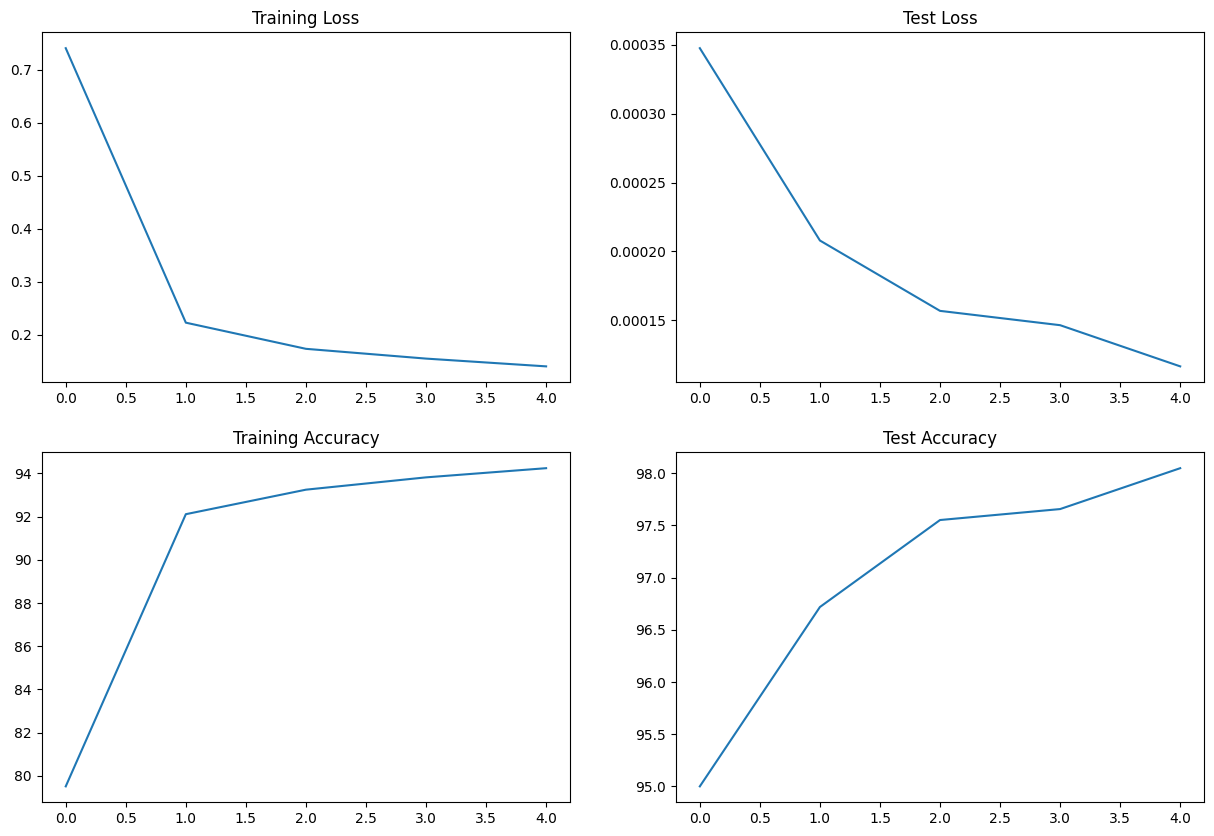

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        #28X28
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1) # 28X28X8
        self.bn1 = nn.BatchNorm2d(8)   # 28x28X8
        self.pool1 = nn.MaxPool2d(2, 2) # 14X14X8
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1) # 14X14X16
        self.bn2 = nn.BatchNorm2d(16)   # 14X14X6
        self.pool2 = nn.MaxPool2d(2, 2) # 7X7X16
        self.conv4 = nn.Conv2d(16, 8, kernel_size=1) # 7X7X4
        self.conv5 = nn.Conv2d(8, 16, kernel_size=3) # 5X5X16
        self.bn3 = nn.BatchNorm2d(16)   # 5X5X16
        self.fc1 = nn.Linear(16*5*5, 40)
        self.drop = nn.Dropout(p=0.1)
        self.fc2 = nn.Linear(40, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)), 2)
        x = self.pool1(x)
        x = F.relu(self.bn2(self.conv2(x)), 2)
        x = self.pool2(x)
        x = self.conv4(x)
        x = F.relu(self.bn3(self.conv5(x)), 2)
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = self.drop(self.fc2(x))
        return F.log_softmax(x, dim=1)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 5

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  #scheduler.step()

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Epoch 1


Train: Loss=0.3240 Batch_id=117 Accuracy=78.47: 100%|██████████| 118/118 [00:48<00:00,  2.44it/s]


Test set: Average loss: 0.0003, Accuracy: 57040/60000 (95.07%)

Epoch 2


Train: Loss=0.3268 Batch_id=117 Accuracy=91.95: 100%|██████████| 118/118 [00:40<00:00,  2.92it/s]


Test set: Average loss: 0.0002, Accuracy: 58066/60000 (96.78%)

Epoch 3


Train: Loss=0.1689 Batch_id=117 Accuracy=93.27: 100%|██████████| 118/118 [00:40<00:00,  2.90it/s]


Test set: Average loss: 0.0002, Accuracy: 58549/60000 (97.58%)

Epoch 4


Train: Loss=0.1056 Batch_id=117 Accuracy=93.97: 100%|██████████| 118/118 [00:41<00:00,  2.83it/s]


Test set: Average loss: 0.0001, Accuracy: 58676/60000 (97.79%)

Epoch 5


Train: Loss=0.1119 Batch_id=117 Accuracy=94.13: 100%|██████████| 118/118 [00:40<00:00,  2.91it/s]


Test set: Average loss: 0.0001, Accuracy: 58869/60000 (98.11%)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
       BatchNorm2d-2            [-1, 8, 28, 28]              16
         MaxPool2d-3            [-1, 8, 14, 14]               0
            Conv2d-4           [-1, 16, 14, 14]           1,168
       BatchNorm2d-5           [-1, 16, 14, 14]              32
         MaxPool2d-6             [-1, 16, 7, 7]               0
            Conv2d-7              [-1, 8, 7, 7]             136
            Conv2d-8             [-1, 16, 5, 5]           1,168
       BatchNorm2d-9             [-1, 16, 5, 5]              32
           Linear-10                   [-1, 42]          16,842
           Linear-11                   [-1, 10]             430
          Dropout-12                   [-1, 10]               0
Total params: 19,904
Trainable params: 

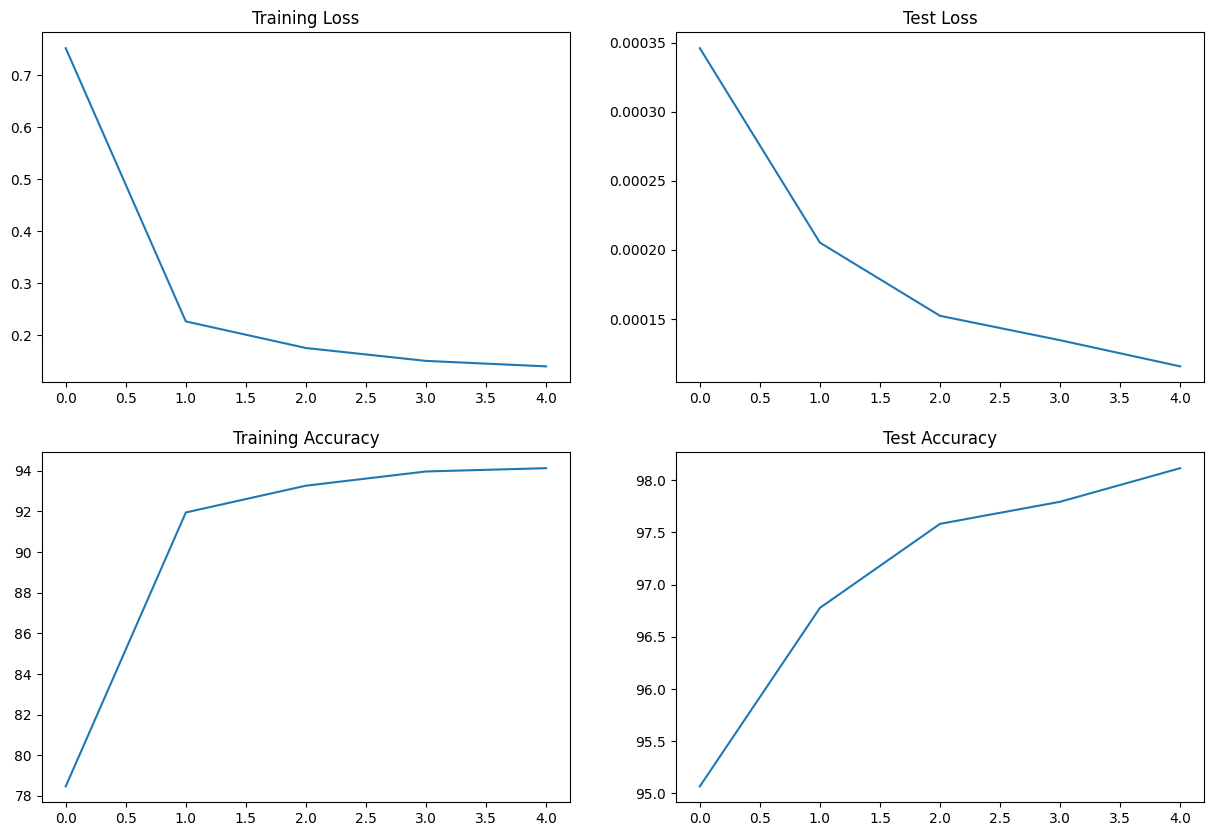

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        #28X28
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1) # 28X28X8
        self.bn1 = nn.BatchNorm2d(8)   # 28x28X8
        self.pool1 = nn.MaxPool2d(2, 2) # 14X14X8
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1) # 14X14X16
        self.bn2 = nn.BatchNorm2d(16)   # 14X14X6
        self.pool2 = nn.MaxPool2d(2, 2) # 7X7X16
        self.conv4 = nn.Conv2d(16, 8, kernel_size=1) # 7X7X4
        self.conv5 = nn.Conv2d(8, 16, kernel_size=3) # 5X5X16
        self.bn3 = nn.BatchNorm2d(16)   # 5X5X16
        self.fc1 = nn.Linear(16*5*5, 42)
        self.drop = nn.Dropout(p=0.1)
        self.fc2 = nn.Linear(42, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)), 2)
        x = self.pool1(x)
        x = F.relu(self.bn2(self.conv2(x)), 2)
        x = self.pool2(x)
        x = self.conv4(x)
        x = F.relu(self.bn3(self.conv5(x)), 2)
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = self.drop(self.fc2(x))
        return F.log_softmax(x, dim=1)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 5

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  #scheduler.step()

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Epoch 1


Train: Loss=1.7454 Batch_id=117 Accuracy=27.56: 100%|██████████| 118/118 [00:50<00:00,  2.36it/s]


Test set: Average loss: 0.0034, Accuracy: 22495/60000 (37.49%)

Epoch 2


Train: Loss=1.1572 Batch_id=117 Accuracy=60.56: 100%|██████████| 118/118 [00:43<00:00,  2.74it/s]


Test set: Average loss: 0.0023, Accuracy: 40041/60000 (66.73%)

Epoch 3


Train: Loss=0.8104 Batch_id=117 Accuracy=78.64: 100%|██████████| 118/118 [00:42<00:00,  2.76it/s]


Test set: Average loss: 0.0016, Accuracy: 50005/60000 (83.34%)

Epoch 4


Train: Loss=0.6583 Batch_id=117 Accuracy=87.22: 100%|██████████| 118/118 [00:41<00:00,  2.82it/s]


Test set: Average loss: 0.0012, Accuracy: 52733/60000 (87.89%)

Epoch 5


Train: Loss=0.4447 Batch_id=117 Accuracy=90.26: 100%|██████████| 118/118 [00:41<00:00,  2.84it/s]


Test set: Average loss: 0.0009, Accuracy: 54578/60000 (90.96%)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
       BatchNorm2d-2            [-1, 8, 28, 28]              16
         MaxPool2d-3            [-1, 8, 14, 14]               0
            Conv2d-4           [-1, 16, 14, 14]           1,168
       BatchNorm2d-5           [-1, 16, 14, 14]              32
         MaxPool2d-6             [-1, 16, 7, 7]               0
            Conv2d-7              [-1, 8, 7, 7]             136
            Conv2d-8             [-1, 16, 5, 5]           1,168
       BatchNorm2d-9             [-1, 16, 5, 5]              32
AdaptiveAvgPool2d-10             [-1, 16, 1, 1]               0
           Linear-11                   [-1, 10]             170
Total params: 2,802
Trainable params: 2,802
Non-trainable params: 0
-----------------------------------

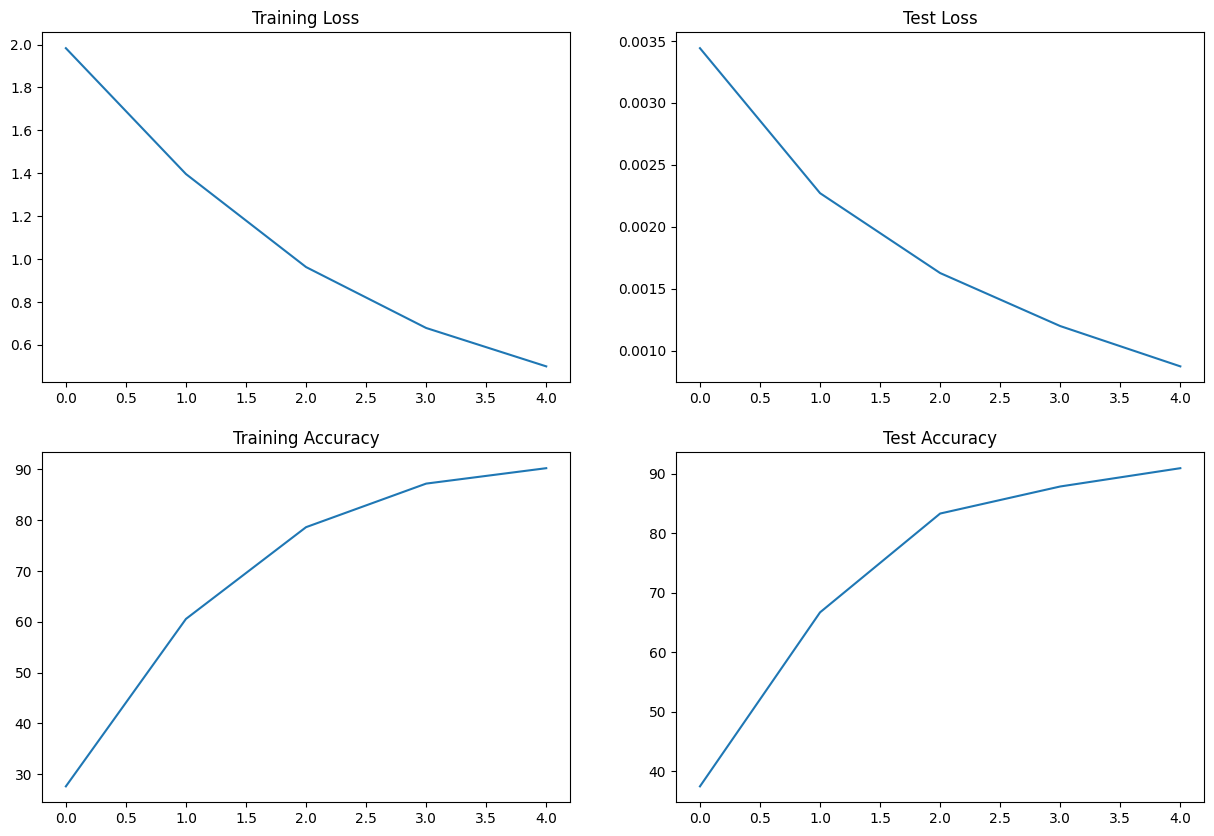

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        # 28x28
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)   # 28x28x8
        self.bn1 = nn.BatchNorm2d(8)                             # 28x28x8
        self.pool1 = nn.MaxPool2d(2, 2)                          # 14x14x8

        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)  # 14x14x16
        self.bn2 = nn.BatchNorm2d(16)                            # 14x14x16
        self.pool2 = nn.MaxPool2d(2, 2)                          # 7x7x16

        self.conv4 = nn.Conv2d(16, 8, kernel_size=1)             # 7x7x8
        self.conv5 = nn.Conv2d(8, 16, kernel_size=3)             # 5x5x16
        self.bn3 = nn.BatchNorm2d(16)                            # 5x5x16

        # ✅ Replace FC layers with GAP + small classifier
        self.gap = nn.AdaptiveAvgPool2d((1, 1))                  # -> [B,16,1,1]
        self.fc_out = nn.Linear(16, 10)                          # final classifier

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)

        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)

        x = self.conv4(x)
        x = F.relu(self.bn3(self.conv5(x)))

        # ✅ Apply GAP
        x = self.gap(x)                  # [B, 16, 1, 1]
        x = torch.flatten(x, 1)          # [B, 16]

        # Final classifier
        x = self.fc_out(x)

        return F.log_softmax(x, dim=1)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 5

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  #scheduler.step()

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Epoch 1


Train: Loss=0.2614 Batch_id=117 Accuracy=71.03: 100%|██████████| 118/118 [00:52<00:00,  2.24it/s]


Test set: Average loss: 0.0005, Accuracy: 56107/60000 (93.51%)

Epoch 2


Train: Loss=0.2158 Batch_id=117 Accuracy=91.50: 100%|██████████| 118/118 [00:45<00:00,  2.60it/s]


Test set: Average loss: 0.0002, Accuracy: 57866/60000 (96.44%)

Epoch 3


Train: Loss=0.1597 Batch_id=117 Accuracy=93.17: 100%|██████████| 118/118 [00:45<00:00,  2.60it/s]


Test set: Average loss: 0.0002, Accuracy: 58034/60000 (96.72%)

Epoch 4


Train: Loss=0.1289 Batch_id=117 Accuracy=93.74: 100%|██████████| 118/118 [00:44<00:00,  2.64it/s]


Test set: Average loss: 0.0001, Accuracy: 58608/60000 (97.68%)

Epoch 5


Train: Loss=0.1377 Batch_id=117 Accuracy=94.03: 100%|██████████| 118/118 [00:45<00:00,  2.62it/s]


Test set: Average loss: 0.0001, Accuracy: 58767/60000 (97.94%)

Epoch 6


Train: Loss=0.1422 Batch_id=117 Accuracy=94.47: 100%|██████████| 118/118 [00:44<00:00,  2.64it/s]


Test set: Average loss: 0.0001, Accuracy: 58842/60000 (98.07%)

Epoch 7


Train: Loss=0.1192 Batch_id=117 Accuracy=94.42: 100%|██████████| 118/118 [00:44<00:00,  2.63it/s]


Test set: Average loss: 0.0001, Accuracy: 58793/60000 (97.99%)

Epoch 8


Train: Loss=0.2528 Batch_id=117 Accuracy=94.75: 100%|██████████| 118/118 [00:44<00:00,  2.62it/s]


Test set: Average loss: 0.0001, Accuracy: 59020/60000 (98.37%)

Epoch 9


Train: Loss=0.0818 Batch_id=117 Accuracy=94.72: 100%|██████████| 118/118 [00:44<00:00,  2.64it/s]


Test set: Average loss: 0.0001, Accuracy: 58995/60000 (98.33%)

Epoch 10


Train: Loss=0.2020 Batch_id=117 Accuracy=94.82: 100%|██████████| 118/118 [00:44<00:00,  2.62it/s]


Test set: Average loss: 0.0001, Accuracy: 59151/60000 (98.58%)

Epoch 11


Train: Loss=0.1038 Batch_id=117 Accuracy=94.74: 100%|██████████| 118/118 [00:44<00:00,  2.63it/s]


Test set: Average loss: 0.0001, Accuracy: 59123/60000 (98.54%)

Epoch 12


Train: Loss=0.0711 Batch_id=117 Accuracy=95.00: 100%|██████████| 118/118 [00:45<00:00,  2.61it/s]


Test set: Average loss: 0.0001, Accuracy: 59146/60000 (98.58%)

Epoch 13


Train: Loss=0.1006 Batch_id=117 Accuracy=95.17: 100%|██████████| 118/118 [00:44<00:00,  2.62it/s]


Test set: Average loss: 0.0001, Accuracy: 59233/60000 (98.72%)

Epoch 14


Train: Loss=0.1159 Batch_id=117 Accuracy=95.01: 100%|██████████| 118/118 [00:44<00:00,  2.63it/s]


Test set: Average loss: 0.0001, Accuracy: 59306/60000 (98.84%)

Epoch 15


Train: Loss=0.1137 Batch_id=117 Accuracy=95.31: 100%|██████████| 118/118 [00:45<00:00,  2.62it/s]


Test set: Average loss: 0.0001, Accuracy: 59210/60000 (98.68%)

Epoch 16


Train: Loss=0.1265 Batch_id=117 Accuracy=95.16: 100%|██████████| 118/118 [00:45<00:00,  2.61it/s]


Test set: Average loss: 0.0001, Accuracy: 59014/60000 (98.36%)

Epoch 17


Train: Loss=0.0998 Batch_id=117 Accuracy=95.27: 100%|██████████| 118/118 [00:45<00:00,  2.62it/s]


Test set: Average loss: 0.0001, Accuracy: 59340/60000 (98.90%)

Epoch 18


Train: Loss=0.1941 Batch_id=117 Accuracy=95.30: 100%|██████████| 118/118 [00:44<00:00,  2.63it/s]


Test set: Average loss: 0.0001, Accuracy: 59355/60000 (98.92%)

Epoch 19


Train: Loss=0.0814 Batch_id=117 Accuracy=95.23: 100%|██████████| 118/118 [00:44<00:00,  2.64it/s]


Test set: Average loss: 0.0001, Accuracy: 59236/60000 (98.73%)

Epoch 20


Train: Loss=0.0532 Batch_id=117 Accuracy=95.38: 100%|██████████| 118/118 [00:44<00:00,  2.64it/s]


Test set: Average loss: 0.0001, Accuracy: 59323/60000 (98.87%)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              40
       BatchNorm2d-2            [-1, 4, 26, 26]               8
            Conv2d-3            [-1, 8, 24, 24]             296
       BatchNorm2d-4            [-1, 8, 24, 24]              16
         MaxPool2d-5            [-1, 8, 12, 12]               0
            Conv2d-6           [-1, 16, 10, 10]           1,168
       BatchNorm2d-7           [-1, 16, 10, 10]              32
            Conv2d-8             [-1, 32, 8, 8]           4,640
       BatchNorm2d-9             [-1, 32, 8, 8]              64
        MaxPool2d-10             [-1, 32, 4, 4]               0
           Conv2d-11              [-1, 4, 4, 4]             132
           Conv2d-12              [-1, 8, 4, 4]             296
      BatchNorm2d-13              [-1, 

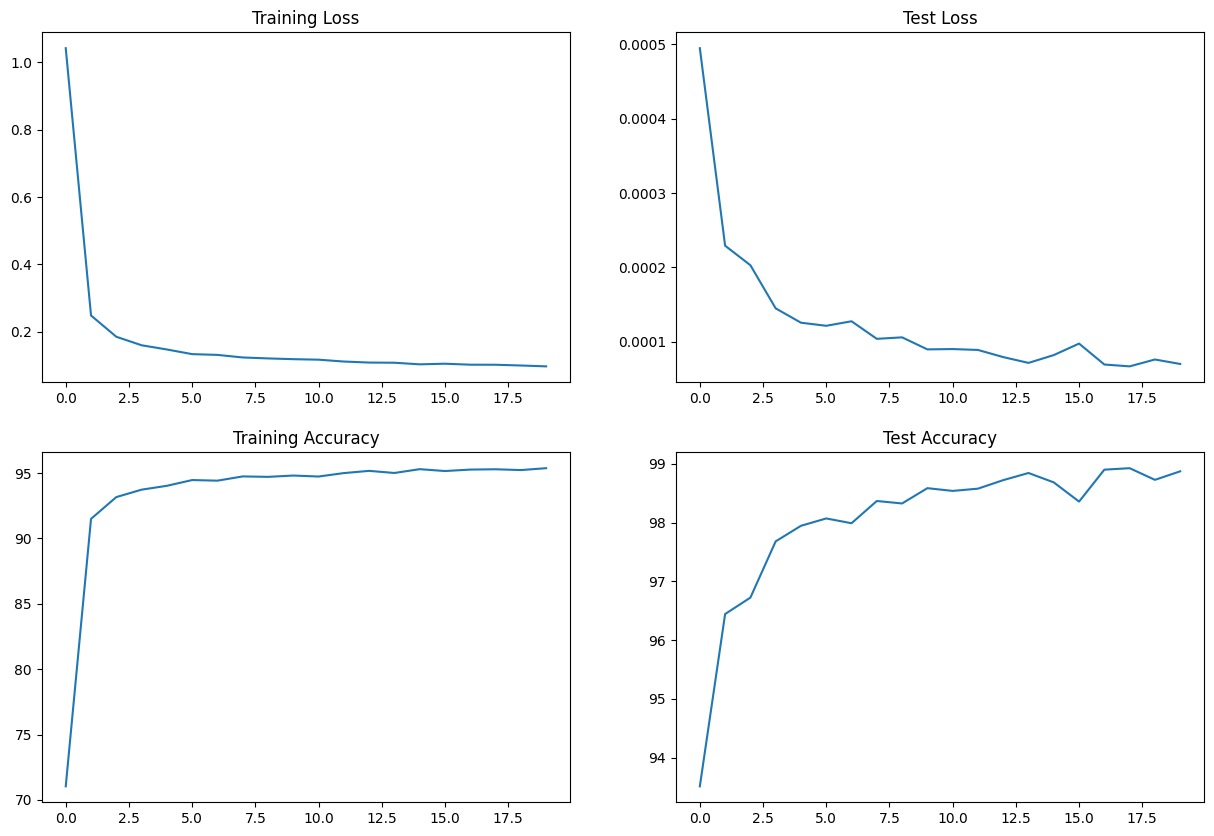

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        #28X28
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3) # 26X26X4
        self.bn1 = nn.BatchNorm2d(4)   # 26x26X4
        self.conv2 = nn.Conv2d(4, 8, kernel_size=3) # 24X24X8
        self.bn2 = nn.BatchNorm2d(8)   # 24X24X8
        self.pool1 = nn.MaxPool2d(2, 2) # 12X12X8
        self.conv3 = nn.Conv2d(8, 16, kernel_size=3) # 10X10X16
        self.bn3 = nn.BatchNorm2d(16)   # 10X10X16
        self.conv4 = nn.Conv2d(16, 32, kernel_size=3) # 8X8X32
        self.bn4 = nn.BatchNorm2d(32)   # 8X8X32
        self.pool2 = nn.MaxPool2d(2, 2) # 4X4X32
        self.conv5 = nn.Conv2d(32, 4, kernel_size=1) # 4X4X4
        self.conv6 = nn.Conv2d(4, 8, kernel_size=3, padding=1) # 4X4X8
        self.bn6 = nn.BatchNorm2d(8)   # 4X4X8
        self.fc1 = nn.Linear(8*4*4, 40)
        self.drop = nn.Dropout(p=0.1)
        self.fc2 = nn.Linear(40, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)), 2)
        x = F.relu(self.bn2(self.conv2(x)), 2)
        x = self.pool1(x)
        x = F.relu(self.bn3(self.conv3(x)), 2)
        x = F.relu(self.bn4(self.conv4(x)), 2)
        x = self.pool2(x)
        x = self.conv5(x)
        x = F.relu(self.bn6(self.conv6(x)), 2)
        x = x.view(-1,8*4*4)
        x = F.relu(self.fc1(x))
        x = self.drop(self.fc2(x))
        # x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  #scheduler.step()

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Epoch 1


Train: Loss=0.2309 Batch_id=117 Accuracy=79.31: 100%|██████████| 118/118 [01:13<00:00,  1.61it/s]


Test set: Average loss: 0.0004, Accuracy: 57267/60000 (95.44%)

Epoch 2


Train: Loss=0.1170 Batch_id=117 Accuracy=96.42: 100%|██████████| 118/118 [01:05<00:00,  1.80it/s]


Test set: Average loss: 0.0002, Accuracy: 58266/60000 (97.11%)

Epoch 3


Train: Loss=0.0470 Batch_id=117 Accuracy=97.48: 100%|██████████| 118/118 [01:05<00:00,  1.79it/s]


Test set: Average loss: 0.0002, Accuracy: 58543/60000 (97.57%)

Epoch 4


Train: Loss=0.1064 Batch_id=117 Accuracy=97.90: 100%|██████████| 118/118 [01:05<00:00,  1.81it/s]


Test set: Average loss: 0.0001, Accuracy: 58620/60000 (97.70%)

Epoch 5


Train: Loss=0.1073 Batch_id=117 Accuracy=98.14: 100%|██████████| 118/118 [01:05<00:00,  1.80it/s]


Test set: Average loss: 0.0001, Accuracy: 58929/60000 (98.22%)

Epoch 6


Train: Loss=0.0404 Batch_id=117 Accuracy=98.36: 100%|██████████| 118/118 [01:05<00:00,  1.79it/s]


Test set: Average loss: 0.0001, Accuracy: 58899/60000 (98.17%)

Epoch 7


Train: Loss=0.1040 Batch_id=117 Accuracy=98.51: 100%|██████████| 118/118 [01:05<00:00,  1.80it/s]


Test set: Average loss: 0.0001, Accuracy: 59155/60000 (98.59%)

Epoch 8


Train: Loss=0.0681 Batch_id=117 Accuracy=98.64: 100%|██████████| 118/118 [01:05<00:00,  1.80it/s]


Test set: Average loss: 0.0001, Accuracy: 59180/60000 (98.63%)

Epoch 9


Train: Loss=0.0617 Batch_id=117 Accuracy=98.64: 100%|██████████| 118/118 [01:04<00:00,  1.82it/s]


Test set: Average loss: 0.0001, Accuracy: 59182/60000 (98.64%)

Epoch 10


Train: Loss=0.0690 Batch_id=117 Accuracy=98.71: 100%|██████████| 118/118 [01:05<00:00,  1.81it/s]


Test set: Average loss: 0.0001, Accuracy: 59307/60000 (98.84%)

Epoch 11


Train: Loss=0.0207 Batch_id=117 Accuracy=98.81: 100%|██████████| 118/118 [01:04<00:00,  1.82it/s]


Test set: Average loss: 0.0001, Accuracy: 59347/60000 (98.91%)

Epoch 12


Train: Loss=0.0203 Batch_id=117 Accuracy=98.80: 100%|██████████| 118/118 [01:05<00:00,  1.81it/s]


Test set: Average loss: 0.0001, Accuracy: 59284/60000 (98.81%)

Epoch 13


Train: Loss=0.0095 Batch_id=117 Accuracy=98.95: 100%|██████████| 118/118 [01:05<00:00,  1.81it/s]


Test set: Average loss: 0.0001, Accuracy: 59273/60000 (98.79%)

Epoch 14


Train: Loss=0.0084 Batch_id=117 Accuracy=99.02: 100%|██████████| 118/118 [01:05<00:00,  1.81it/s]


Test set: Average loss: 0.0001, Accuracy: 59372/60000 (98.95%)

Epoch 15


Train: Loss=0.0069 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [01:05<00:00,  1.81it/s]


Test set: Average loss: 0.0001, Accuracy: 59423/60000 (99.04%)

Epoch 16


Train: Loss=0.0519 Batch_id=117 Accuracy=99.01: 100%|██████████| 118/118 [01:05<00:00,  1.81it/s]


Test set: Average loss: 0.0001, Accuracy: 59482/60000 (99.14%)

Epoch 17


Train: Loss=0.0027 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [01:05<00:00,  1.81it/s]


Test set: Average loss: 0.0001, Accuracy: 59458/60000 (99.10%)

Epoch 18


Train: Loss=0.0131 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [01:05<00:00,  1.80it/s]


Test set: Average loss: 0.0001, Accuracy: 59431/60000 (99.05%)

Epoch 19


Train: Loss=0.0107 Batch_id=117 Accuracy=99.11: 100%|██████████| 118/118 [01:05<00:00,  1.80it/s]


Test set: Average loss: 0.0001, Accuracy: 59494/60000 (99.16%)

Epoch 20


Train: Loss=0.0092 Batch_id=117 Accuracy=99.13: 100%|██████████| 118/118 [01:05<00:00,  1.79it/s]


Test set: Average loss: 0.0001, Accuracy: 59501/60000 (99.17%)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              80
       BatchNorm2d-2            [-1, 8, 26, 26]              16
            Conv2d-3           [-1, 16, 24, 24]           1,168
       BatchNorm2d-4           [-1, 16, 24, 24]              32
         MaxPool2d-5           [-1, 16, 12, 12]               0
            Conv2d-6           [-1, 32, 10, 10]           4,640
       BatchNorm2d-7           [-1, 32, 10, 10]              64
            Conv2d-8             [-1, 32, 8, 8]           9,248
       BatchNorm2d-9             [-1, 32, 8, 8]              64
        MaxPool2d-10             [-1, 32, 4, 4]               0
           Conv2d-11              [-1, 4, 4, 4]             132
           Conv2d-12              [-1, 8, 4, 4]             296
      BatchNorm2d-13              [-1, 

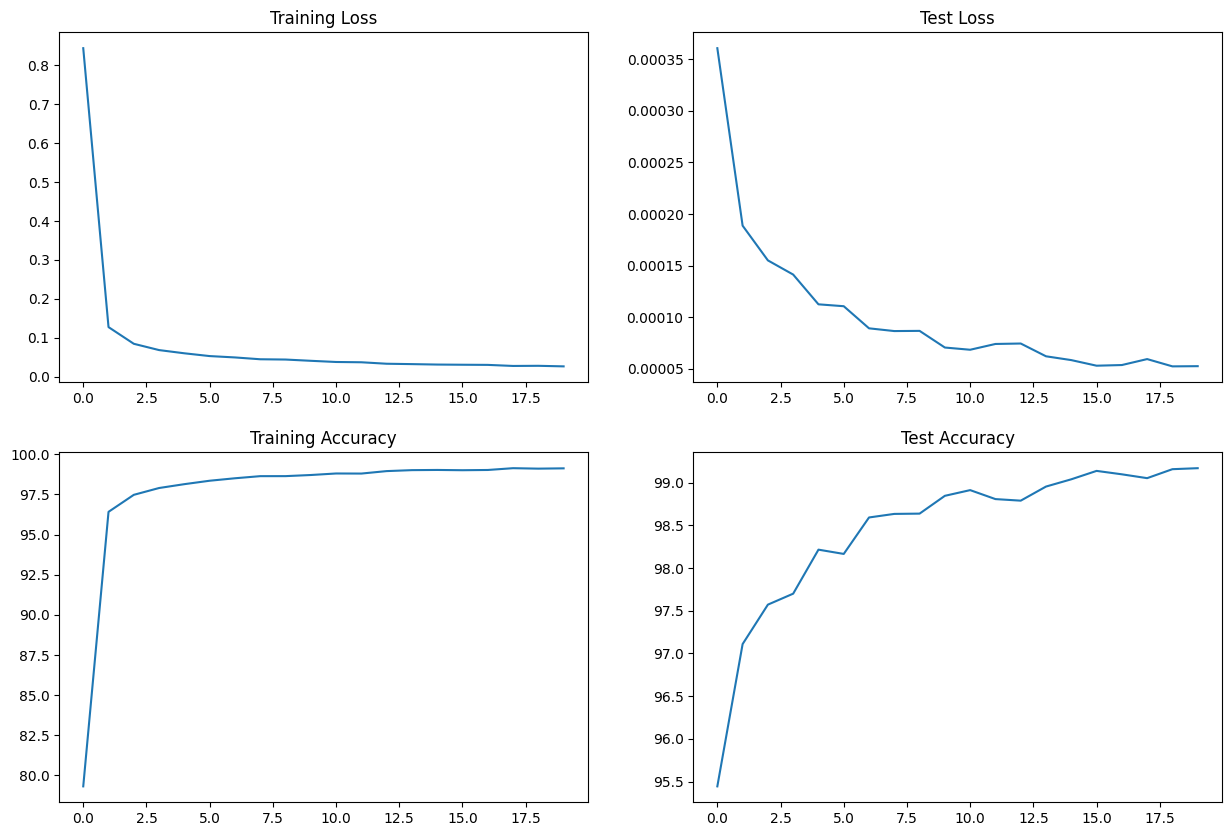

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        #28X28
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3) # 26X26X8
        self.bn1 = nn.BatchNorm2d(8)   # 26x26X8
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3) # 24X24X16
        self.bn2 = nn.BatchNorm2d(16)   # 24X24X16
        self.pool1 = nn.MaxPool2d(2, 2) # 12X12X16
        self.conv3 = nn.Conv2d(16, 32, kernel_size=3) # 10X10X32
        self.bn3 = nn.BatchNorm2d(32)   # 10X10X32
        self.conv4 = nn.Conv2d(32, 32, kernel_size=3) # 8X8X32
        self.bn4 = nn.BatchNorm2d(32)   # 8X8X32
        self.pool2 = nn.MaxPool2d(2, 2) # 4X4X32
        self.conv5 = nn.Conv2d(32, 4, kernel_size=1) # 4X4X4
        self.conv6 = nn.Conv2d(4, 8, kernel_size=3, padding=1) # 4X4X8
        self.bn6 = nn.BatchNorm2d(8)   # 4X4X8
        self.fc1 = nn.Linear(8*4*4, 40)
        # self.drop = nn.Dropout(p=0.1)
        self.fc2 = nn.Linear(40, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)), 2)
        x = F.relu(self.bn2(self.conv2(x)), 2)
        x = self.pool1(x)
        x = F.relu(self.bn3(self.conv3(x)), 2)
        x = F.relu(self.bn4(self.conv4(x)), 2)
        x = self.pool2(x)
        x = self.conv5(x)
        x = F.relu(self.bn6(self.conv6(x)), 2)
        x = x.view(-1,8*4*4)
        x = F.relu(self.fc1(x))
        # x = self.drop(self.fc2(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  #scheduler.step()

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Epoch 1


Train: Loss=0.1712 Batch_id=117 Accuracy=78.65: 100%|██████████| 118/118 [01:05<00:00,  1.81it/s]


Test set: Average loss: 0.0004, Accuracy: 56830/60000 (94.72%)

Epoch 2


Train: Loss=0.0642 Batch_id=117 Accuracy=96.22: 100%|██████████| 118/118 [00:57<00:00,  2.07it/s]


Test set: Average loss: 0.0002, Accuracy: 58132/60000 (96.89%)

Epoch 3


Train: Loss=0.1380 Batch_id=117 Accuracy=97.38: 100%|██████████| 118/118 [00:58<00:00,  2.03it/s]


Test set: Average loss: 0.0002, Accuracy: 58534/60000 (97.56%)

Epoch 4


Train: Loss=0.0537 Batch_id=117 Accuracy=97.78: 100%|██████████| 118/118 [00:57<00:00,  2.06it/s]


Test set: Average loss: 0.0001, Accuracy: 58754/60000 (97.92%)

Epoch 5


Train: Loss=0.0735 Batch_id=117 Accuracy=98.08: 100%|██████████| 118/118 [00:56<00:00,  2.08it/s]


Test set: Average loss: 0.0001, Accuracy: 58818/60000 (98.03%)

Epoch 6


Train: Loss=0.0564 Batch_id=117 Accuracy=98.25: 100%|██████████| 118/118 [00:57<00:00,  2.07it/s]


Test set: Average loss: 0.0001, Accuracy: 59011/60000 (98.35%)

Epoch 7


Train: Loss=0.0101 Batch_id=117 Accuracy=98.37: 100%|██████████| 118/118 [00:57<00:00,  2.06it/s]


Test set: Average loss: 0.0001, Accuracy: 58906/60000 (98.18%)

Epoch 8


Train: Loss=0.0419 Batch_id=117 Accuracy=98.45: 100%|██████████| 118/118 [00:57<00:00,  2.05it/s]


Test set: Average loss: 0.0001, Accuracy: 59114/60000 (98.52%)

Epoch 9


Train: Loss=0.0068 Batch_id=117 Accuracy=98.52: 100%|██████████| 118/118 [00:56<00:00,  2.07it/s]


Test set: Average loss: 0.0001, Accuracy: 59075/60000 (98.46%)

Epoch 10


Train: Loss=0.0249 Batch_id=117 Accuracy=98.62: 100%|██████████| 118/118 [00:57<00:00,  2.06it/s]


Test set: Average loss: 0.0001, Accuracy: 59171/60000 (98.62%)

Epoch 11


Train: Loss=0.0397 Batch_id=117 Accuracy=98.63: 100%|██████████| 118/118 [00:57<00:00,  2.05it/s]


Test set: Average loss: 0.0001, Accuracy: 59237/60000 (98.73%)

Epoch 12


Train: Loss=0.0074 Batch_id=117 Accuracy=98.72: 100%|██████████| 118/118 [00:56<00:00,  2.07it/s]


Test set: Average loss: 0.0001, Accuracy: 59083/60000 (98.47%)

Epoch 13


Train: Loss=0.0215 Batch_id=117 Accuracy=98.84: 100%|██████████| 118/118 [00:57<00:00,  2.07it/s]


Test set: Average loss: 0.0001, Accuracy: 59380/60000 (98.97%)

Epoch 14


Train: Loss=0.0509 Batch_id=117 Accuracy=98.86: 100%|██████████| 118/118 [00:57<00:00,  2.05it/s]


Test set: Average loss: 0.0001, Accuracy: 59338/60000 (98.90%)

Epoch 15


Train: Loss=0.0253 Batch_id=117 Accuracy=98.85: 100%|██████████| 118/118 [00:57<00:00,  2.05it/s]


Test set: Average loss: 0.0001, Accuracy: 59309/60000 (98.85%)

Epoch 16


Train: Loss=0.0231 Batch_id=117 Accuracy=98.91: 100%|██████████| 118/118 [00:56<00:00,  2.08it/s]


Test set: Average loss: 0.0001, Accuracy: 59410/60000 (99.02%)

Epoch 17


Train: Loss=0.0145 Batch_id=117 Accuracy=98.85: 100%|██████████| 118/118 [00:57<00:00,  2.06it/s]


Test set: Average loss: 0.0001, Accuracy: 59376/60000 (98.96%)

Epoch 18


Train: Loss=0.0163 Batch_id=117 Accuracy=98.97: 100%|██████████| 118/118 [00:57<00:00,  2.05it/s]


Test set: Average loss: 0.0001, Accuracy: 59372/60000 (98.95%)

Epoch 19


Train: Loss=0.0228 Batch_id=117 Accuracy=98.98: 100%|██████████| 118/118 [00:57<00:00,  2.05it/s]


Test set: Average loss: 0.0001, Accuracy: 59420/60000 (99.03%)

Epoch 20


Train: Loss=0.0272 Batch_id=117 Accuracy=98.98: 100%|██████████| 118/118 [00:56<00:00,  2.08it/s]


Test set: Average loss: 0.0001, Accuracy: 59464/60000 (99.11%)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              80
       BatchNorm2d-2            [-1, 8, 26, 26]              16
            Conv2d-3           [-1, 16, 24, 24]           1,168
       BatchNorm2d-4           [-1, 16, 24, 24]              32
         MaxPool2d-5           [-1, 16, 12, 12]               0
            Conv2d-6           [-1, 16, 10, 10]           2,320
       BatchNorm2d-7           [-1, 16, 10, 10]              32
            Conv2d-8             [-1, 16, 8, 8]           2,320
       BatchNorm2d-9             [-1, 16, 8, 8]              32
        MaxPool2d-10             [-1, 16, 4, 4]               0
           Conv2d-11              [-1, 4, 4, 4]              68
           Conv2d-12              [-1, 8, 4, 4]             296
      BatchNorm2d-13              [-1, 

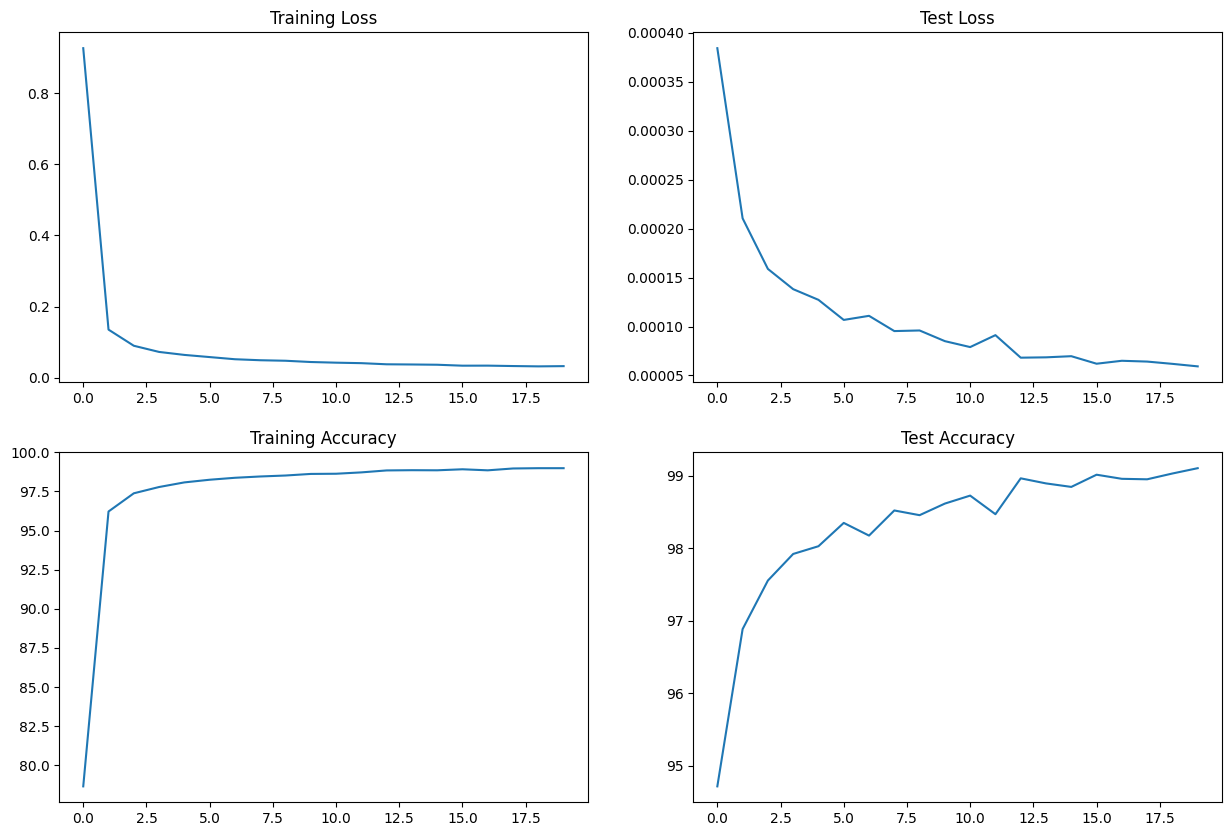

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        #28X28
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3) # 26X26X8
        self.bn1 = nn.BatchNorm2d(8)   # 26x26X8
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3) # 24X24X16
        self.bn2 = nn.BatchNorm2d(16)   # 24X24X16
        self.pool1 = nn.MaxPool2d(2, 2) # 12X12X16
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3) # 10X10X16
        self.bn3 = nn.BatchNorm2d(16)   # 10X10X16
        self.conv4 = nn.Conv2d(16, 16, kernel_size=3) # 8X8X16
        self.bn4 = nn.BatchNorm2d(16)   # 8X8X16
        self.pool2 = nn.MaxPool2d(2, 2) # 4X4X16
        self.conv5 = nn.Conv2d(16, 4, kernel_size=1) # 4X4X4
        self.conv6 = nn.Conv2d(4, 8, kernel_size=3, padding=1) # 4X4X8
        self.bn6 = nn.BatchNorm2d(8)   # 4X4X8
        self.fc1 = nn.Linear(8*4*4, 40)
        # self.drop = nn.Dropout(p=0.1)
        self.fc2 = nn.Linear(40, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)), 2)
        x = F.relu(self.bn2(self.conv2(x)), 2)
        x = self.pool1(x)
        x = F.relu(self.bn3(self.conv3(x)), 2)
        x = F.relu(self.bn4(self.conv4(x)), 2)
        x = self.pool2(x)
        x = self.conv5(x)
        x = F.relu(self.bn6(self.conv6(x)), 2)
        x = x.view(-1,8*4*4)
        x = F.relu(self.fc1(x))
        # x = self.drop(self.fc2(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  #scheduler.step()

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Epoch 1


Train: Loss=0.2064 Batch_id=117 Accuracy=76.36: 100%|██████████| 118/118 [01:01<00:00,  1.92it/s]


Test set: Average loss: 0.0004, Accuracy: 56518/60000 (94.20%)

Epoch 2


Train: Loss=0.2024 Batch_id=117 Accuracy=95.94: 100%|██████████| 118/118 [00:53<00:00,  2.21it/s]


Test set: Average loss: 0.0002, Accuracy: 57829/60000 (96.38%)

Epoch 3


Train: Loss=0.0779 Batch_id=117 Accuracy=97.31: 100%|██████████| 118/118 [00:53<00:00,  2.20it/s]


Test set: Average loss: 0.0002, Accuracy: 58295/60000 (97.16%)

Epoch 4


Train: Loss=0.0634 Batch_id=117 Accuracy=97.67: 100%|██████████| 118/118 [00:53<00:00,  2.20it/s]


Test set: Average loss: 0.0002, Accuracy: 58520/60000 (97.53%)

Epoch 5


Train: Loss=0.0480 Batch_id=117 Accuracy=98.02: 100%|██████████| 118/118 [00:53<00:00,  2.22it/s]


Test set: Average loss: 0.0001, Accuracy: 58936/60000 (98.23%)

Epoch 6


Train: Loss=0.0489 Batch_id=117 Accuracy=98.13: 100%|██████████| 118/118 [00:53<00:00,  2.21it/s]


Test set: Average loss: 0.0001, Accuracy: 58932/60000 (98.22%)

Epoch 7


Train: Loss=0.1084 Batch_id=117 Accuracy=98.27: 100%|██████████| 118/118 [00:53<00:00,  2.21it/s]


Test set: Average loss: 0.0001, Accuracy: 59051/60000 (98.42%)

Epoch 8


Train: Loss=0.0912 Batch_id=117 Accuracy=98.36: 100%|██████████| 118/118 [00:53<00:00,  2.22it/s]


Test set: Average loss: 0.0001, Accuracy: 59073/60000 (98.45%)

Epoch 9


Train: Loss=0.0302 Batch_id=117 Accuracy=98.58: 100%|██████████| 118/118 [00:53<00:00,  2.22it/s]


Test set: Average loss: 0.0001, Accuracy: 59176/60000 (98.63%)

Epoch 10


Train: Loss=0.0263 Batch_id=117 Accuracy=98.62: 100%|██████████| 118/118 [00:53<00:00,  2.19it/s]


Test set: Average loss: 0.0001, Accuracy: 59066/60000 (98.44%)

Epoch 11


Train: Loss=0.0126 Batch_id=117 Accuracy=98.57: 100%|██████████| 118/118 [00:52<00:00,  2.23it/s]


Test set: Average loss: 0.0001, Accuracy: 59211/60000 (98.69%)

Epoch 12


Train: Loss=0.0371 Batch_id=117 Accuracy=98.70: 100%|██████████| 118/118 [00:53<00:00,  2.22it/s]


Test set: Average loss: 0.0001, Accuracy: 59255/60000 (98.76%)

Epoch 13


Train: Loss=0.1315 Batch_id=117 Accuracy=98.69: 100%|██████████| 118/118 [00:53<00:00,  2.22it/s]


Test set: Average loss: 0.0001, Accuracy: 59241/60000 (98.73%)

Epoch 14


Train: Loss=0.0300 Batch_id=117 Accuracy=98.80: 100%|██████████| 118/118 [00:53<00:00,  2.21it/s]


Test set: Average loss: 0.0001, Accuracy: 59215/60000 (98.69%)

Epoch 15


Train: Loss=0.0461 Batch_id=117 Accuracy=98.80: 100%|██████████| 118/118 [00:53<00:00,  2.20it/s]


Test set: Average loss: 0.0001, Accuracy: 59298/60000 (98.83%)

Epoch 16


Train: Loss=0.0109 Batch_id=117 Accuracy=98.81: 100%|██████████| 118/118 [00:54<00:00,  2.18it/s]


Test set: Average loss: 0.0001, Accuracy: 59378/60000 (98.96%)

Epoch 17


Train: Loss=0.0261 Batch_id=117 Accuracy=98.83: 100%|██████████| 118/118 [00:54<00:00,  2.18it/s]


Test set: Average loss: 0.0001, Accuracy: 59305/60000 (98.84%)

Epoch 18


Train: Loss=0.0235 Batch_id=117 Accuracy=98.94: 100%|██████████| 118/118 [00:53<00:00,  2.20it/s]


Test set: Average loss: 0.0001, Accuracy: 59281/60000 (98.80%)

Epoch 19


Train: Loss=0.0623 Batch_id=117 Accuracy=98.95: 100%|██████████| 118/118 [00:53<00:00,  2.19it/s]


Test set: Average loss: 0.0001, Accuracy: 59305/60000 (98.84%)

Epoch 20


Train: Loss=0.0146 Batch_id=117 Accuracy=98.97: 100%|██████████| 118/118 [00:53<00:00,  2.21it/s]


Test set: Average loss: 0.0001, Accuracy: 59315/60000 (98.86%)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              80
       BatchNorm2d-2            [-1, 8, 26, 26]              16
            Conv2d-3           [-1, 16, 24, 24]           1,168
       BatchNorm2d-4           [-1, 16, 24, 24]              32
         MaxPool2d-5           [-1, 16, 12, 12]               0
            Conv2d-6           [-1, 16, 10, 10]           2,320
       BatchNorm2d-7           [-1, 16, 10, 10]              32
            Conv2d-8             [-1, 16, 8, 8]           2,320
       BatchNorm2d-9             [-1, 16, 8, 8]              32
        MaxPool2d-10             [-1, 16, 4, 4]               0
           Conv2d-11              [-1, 4, 4, 4]              68
           Conv2d-12              [-1, 8, 4, 4]             296
      BatchNorm2d-13              [-1, 

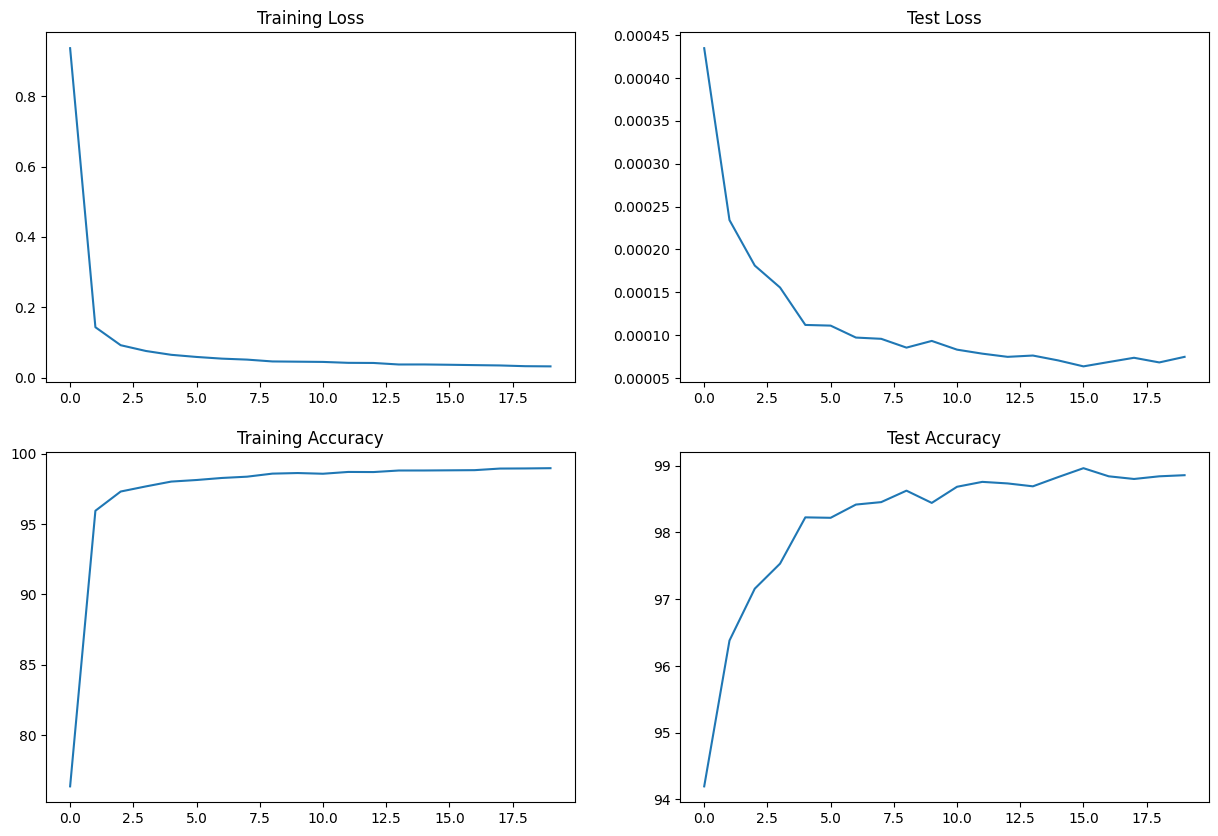

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        #28X28
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3) # 26X26X8
        self.bn1 = nn.BatchNorm2d(8)   # 26x26X8
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3) # 24X24X16
        self.bn2 = nn.BatchNorm2d(16)   # 24X24X16
        self.pool1 = nn.MaxPool2d(2, 2) # 12X12X16
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3) # 10X10X16
        self.bn3 = nn.BatchNorm2d(16)   # 10X10X16
        self.conv4 = nn.Conv2d(16, 16, kernel_size=3) # 8X8X16
        self.bn4 = nn.BatchNorm2d(16)   # 8X8X16
        self.pool2 = nn.MaxPool2d(2, 2) # 4X4X16
        self.conv5 = nn.Conv2d(16, 4, kernel_size=1) # 4X4X4
        self.conv6 = nn.Conv2d(4, 8, kernel_size=3, padding=1) # 4X4X8
        self.bn6 = nn.BatchNorm2d(8)   # 4X4X8
        self.fc1 = nn.Linear(8*4*4, 40)
        self.drop = nn.Dropout(p=0.1)
        self.fc2 = nn.Linear(40, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)), 2)
        x = F.relu(self.bn2(self.conv2(x)), 2)
        x = self.pool1(x)
        x = F.relu(self.bn3(self.conv3(x)), 2)
        x = F.relu(self.bn4(self.conv4(x)), 2)
        x = self.pool2(x)
        x = self.conv5(x)
        x = F.relu(self.bn6(self.conv6(x)), 2)
        x = x.view(-1,8*4*4)
        x = F.relu(self.fc1(x))
        # x = self.drop(self.fc2(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  #scheduler.step()

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Epoch 1


Train: Loss=0.2397 Batch_id=117 Accuracy=80.28: 100%|██████████| 118/118 [00:23<00:00,  4.99it/s]


Test set: Average loss: 0.0004, Accuracy: 56833/60000 (94.72%)

Epoch 2


Train: Loss=0.0861 Batch_id=117 Accuracy=96.11: 100%|██████████| 118/118 [00:21<00:00,  5.40it/s]


Test set: Average loss: 0.0002, Accuracy: 58101/60000 (96.83%)

Epoch 3


Train: Loss=0.0269 Batch_id=117 Accuracy=97.26: 100%|██████████| 118/118 [00:22<00:00,  5.32it/s]


Test set: Average loss: 0.0002, Accuracy: 58416/60000 (97.36%)

Epoch 4


Train: Loss=0.0649 Batch_id=117 Accuracy=97.66: 100%|██████████| 118/118 [00:22<00:00,  5.35it/s]


Test set: Average loss: 0.0001, Accuracy: 58649/60000 (97.75%)

Epoch 5


Train: Loss=0.0458 Batch_id=117 Accuracy=97.92: 100%|██████████| 118/118 [00:25<00:00,  4.63it/s]


Test set: Average loss: 0.0001, Accuracy: 58835/60000 (98.06%)

Epoch 6


Train: Loss=0.1408 Batch_id=117 Accuracy=98.20: 100%|██████████| 118/118 [00:22<00:00,  5.25it/s]


Test set: Average loss: 0.0001, Accuracy: 58951/60000 (98.25%)

Epoch 7


Train: Loss=0.0210 Batch_id=117 Accuracy=98.39: 100%|██████████| 118/118 [00:22<00:00,  5.27it/s]


Test set: Average loss: 0.0001, Accuracy: 59060/60000 (98.43%)

Epoch 8


Train: Loss=0.0490 Batch_id=117 Accuracy=98.47: 100%|██████████| 118/118 [00:22<00:00,  5.23it/s]


Test set: Average loss: 0.0001, Accuracy: 58928/60000 (98.21%)

Epoch 9


Train: Loss=0.0543 Batch_id=117 Accuracy=98.52: 100%|██████████| 118/118 [00:21<00:00,  5.38it/s]


Test set: Average loss: 0.0001, Accuracy: 59160/60000 (98.60%)

Epoch 10


Train: Loss=0.0288 Batch_id=117 Accuracy=98.55: 100%|██████████| 118/118 [00:22<00:00,  5.32it/s]


Test set: Average loss: 0.0001, Accuracy: 59239/60000 (98.73%)

Epoch 11


Train: Loss=0.0299 Batch_id=117 Accuracy=98.66: 100%|██████████| 118/118 [00:22<00:00,  5.35it/s]


Test set: Average loss: 0.0001, Accuracy: 59176/60000 (98.63%)

Epoch 12


Train: Loss=0.0080 Batch_id=117 Accuracy=98.73: 100%|██████████| 118/118 [00:21<00:00,  5.37it/s]


Test set: Average loss: 0.0001, Accuracy: 59213/60000 (98.69%)

Epoch 13


Train: Loss=0.0500 Batch_id=117 Accuracy=98.72: 100%|██████████| 118/118 [00:22<00:00,  5.21it/s]


Test set: Average loss: 0.0001, Accuracy: 59247/60000 (98.75%)

Epoch 14


Train: Loss=0.0090 Batch_id=117 Accuracy=98.82: 100%|██████████| 118/118 [00:22<00:00,  5.26it/s]


Test set: Average loss: 0.0001, Accuracy: 59210/60000 (98.68%)

Epoch 15


Train: Loss=0.0194 Batch_id=117 Accuracy=98.90: 100%|██████████| 118/118 [00:22<00:00,  5.30it/s]


Test set: Average loss: 0.0001, Accuracy: 59275/60000 (98.79%)

Epoch 16


Train: Loss=0.0573 Batch_id=117 Accuracy=98.84: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]


Test set: Average loss: 0.0001, Accuracy: 59373/60000 (98.95%)

Epoch 17


Train: Loss=0.0291 Batch_id=117 Accuracy=98.84: 100%|██████████| 118/118 [00:21<00:00,  5.40it/s]


Test set: Average loss: 0.0001, Accuracy: 59318/60000 (98.86%)

Epoch 18


Train: Loss=0.0047 Batch_id=117 Accuracy=98.92: 100%|██████████| 118/118 [00:21<00:00,  5.53it/s]


Test set: Average loss: 0.0001, Accuracy: 59345/60000 (98.91%)

Epoch 19


Train: Loss=0.0549 Batch_id=117 Accuracy=98.91: 100%|██████████| 118/118 [00:22<00:00,  5.26it/s]


Test set: Average loss: 0.0001, Accuracy: 59410/60000 (99.02%)

Epoch 20


Train: Loss=0.0848 Batch_id=117 Accuracy=99.01: 100%|██████████| 118/118 [00:21<00:00,  5.37it/s]


Test set: Average loss: 0.0001, Accuracy: 59406/60000 (99.01%)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
       BatchNorm2d-2           [-1, 16, 26, 26]              32
            Conv2d-3           [-1, 16, 24, 24]           2,320
       BatchNorm2d-4           [-1, 16, 24, 24]              32
         MaxPool2d-5           [-1, 16, 12, 12]               0
            Conv2d-6           [-1, 16, 10, 10]           2,320
       BatchNorm2d-7           [-1, 16, 10, 10]              32
            Conv2d-8             [-1, 16, 8, 8]           2,320
       BatchNorm2d-9             [-1, 16, 8, 8]              32
        MaxPool2d-10             [-1, 16, 4, 4]               0
           Conv2d-11              [-1, 4, 4, 4]              68
           Conv2d-12              [-1, 8, 4, 4]             296
      BatchNorm2d-13              [-1, 

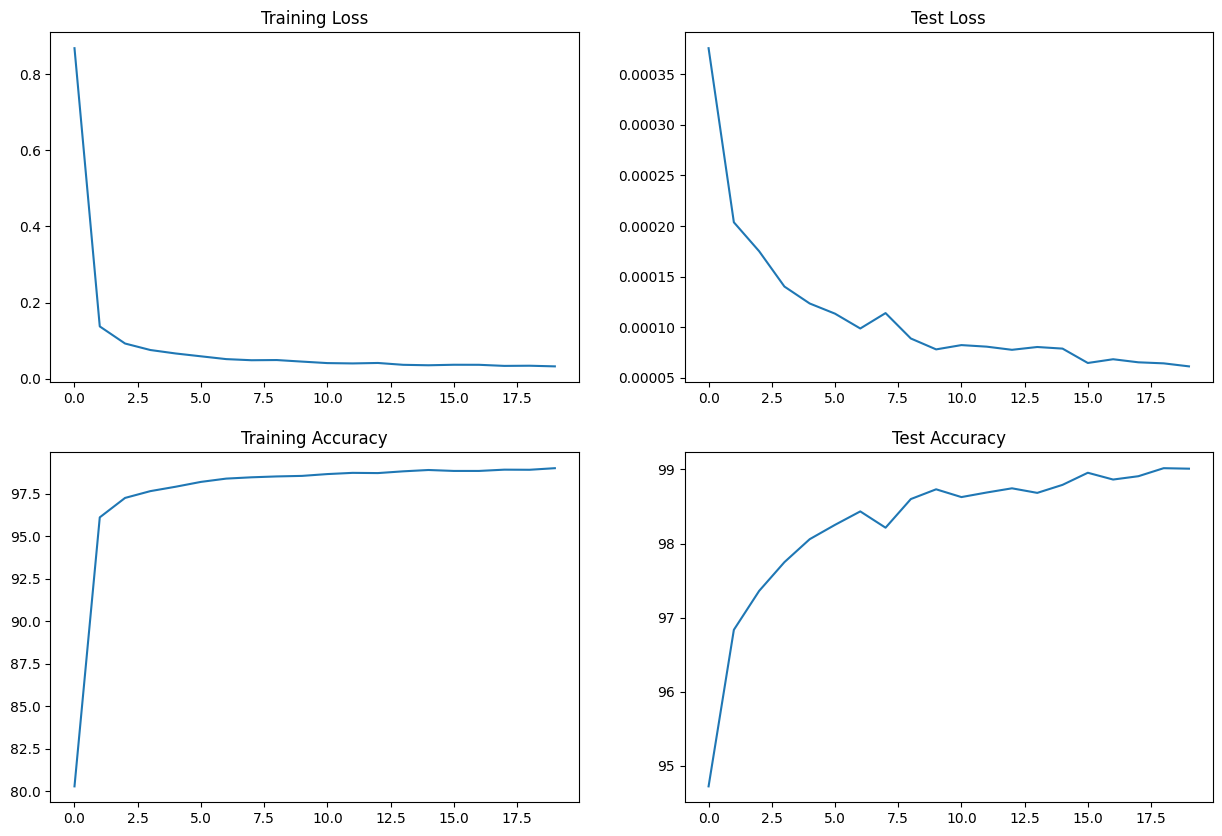

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        #28X28
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3) # 26X26X16
        self.bn1 = nn.BatchNorm2d(16)   # 26x26X16
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3) # 24X24X16
        self.bn2 = nn.BatchNorm2d(16)   # 24X24X16
        self.pool1 = nn.MaxPool2d(2, 2) # 12X12X16
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3) # 10X10X16
        self.bn3 = nn.BatchNorm2d(16)   # 10X10X16
        self.conv4 = nn.Conv2d(16, 16, kernel_size=3) # 8X8X16
        self.bn4 = nn.BatchNorm2d(16)   # 8X8X16
        self.pool2 = nn.MaxPool2d(2, 2) # 4X4X16
        self.conv5 = nn.Conv2d(16, 4, kernel_size=1) # 4X4X4
        self.conv6 = nn.Conv2d(4, 8, kernel_size=3, padding=1) # 4X4X8
        self.bn6 = nn.BatchNorm2d(8)   # 4X4X8
        self.fc1 = nn.Linear(8*4*4, 40)
        self.drop = nn.Dropout(p=0.1)
        self.fc2 = nn.Linear(40, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)), 2)
        x = F.relu(self.bn2(self.conv2(x)), 2)
        x = self.pool1(x)
        x = F.relu(self.bn3(self.conv3(x)), 2)
        x = F.relu(self.bn4(self.conv4(x)), 2)
        x = self.pool2(x)
        x = self.conv5(x)
        x = F.relu(self.bn6(self.conv6(x)), 2)
        x = x.view(-1,8*4*4)
        x = F.relu(self.fc1(x))
        # x = self.drop(self.fc2(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  #scheduler.step()

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Epoch 1


Train: Loss=0.2040 Batch_id=117 Accuracy=77.62: 100%|██████████| 118/118 [00:26<00:00,  4.43it/s]


Test set: Average loss: 0.0004, Accuracy: 57028/60000 (95.05%)

Epoch 2


Train: Loss=0.0562 Batch_id=117 Accuracy=95.72: 100%|██████████| 118/118 [00:22<00:00,  5.31it/s]


Test set: Average loss: 0.0002, Accuracy: 57847/60000 (96.41%)

Epoch 3


Train: Loss=0.0458 Batch_id=117 Accuracy=97.00: 100%|██████████| 118/118 [00:23<00:00,  5.13it/s]


Test set: Average loss: 0.0002, Accuracy: 58598/60000 (97.66%)

Epoch 4


Train: Loss=0.0403 Batch_id=117 Accuracy=97.42: 100%|██████████| 118/118 [00:22<00:00,  5.25it/s]


Test set: Average loss: 0.0002, Accuracy: 58564/60000 (97.61%)

Epoch 5


Train: Loss=0.0552 Batch_id=117 Accuracy=97.80: 100%|██████████| 118/118 [00:22<00:00,  5.30it/s]


Test set: Average loss: 0.0001, Accuracy: 58925/60000 (98.21%)

Epoch 6


Train: Loss=0.0453 Batch_id=117 Accuracy=97.95: 100%|██████████| 118/118 [00:22<00:00,  5.28it/s]


Test set: Average loss: 0.0001, Accuracy: 58991/60000 (98.32%)

Epoch 7


Train: Loss=0.0908 Batch_id=117 Accuracy=98.13: 100%|██████████| 118/118 [00:21<00:00,  5.41it/s]


Test set: Average loss: 0.0001, Accuracy: 58929/60000 (98.22%)

Epoch 8


Train: Loss=0.0846 Batch_id=117 Accuracy=98.28: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]


Test set: Average loss: 0.0001, Accuracy: 59031/60000 (98.39%)

Epoch 9


Train: Loss=0.0360 Batch_id=117 Accuracy=98.42: 100%|██████████| 118/118 [00:22<00:00,  5.25it/s]


Test set: Average loss: 0.0001, Accuracy: 59079/60000 (98.47%)

Epoch 10


Train: Loss=0.0175 Batch_id=117 Accuracy=98.43: 100%|██████████| 118/118 [00:22<00:00,  5.27it/s]


Test set: Average loss: 0.0001, Accuracy: 59094/60000 (98.49%)

Epoch 11


Train: Loss=0.0510 Batch_id=117 Accuracy=98.48: 100%|██████████| 118/118 [00:22<00:00,  5.26it/s]


Test set: Average loss: 0.0001, Accuracy: 59250/60000 (98.75%)

Epoch 12


Train: Loss=0.0033 Batch_id=117 Accuracy=98.63: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]


Test set: Average loss: 0.0001, Accuracy: 59091/60000 (98.48%)

Epoch 13


Train: Loss=0.0739 Batch_id=117 Accuracy=98.64: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]


Test set: Average loss: 0.0001, Accuracy: 59262/60000 (98.77%)

Epoch 14


Train: Loss=0.0049 Batch_id=117 Accuracy=98.68: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]


Test set: Average loss: 0.0001, Accuracy: 59368/60000 (98.95%)

Epoch 15


Train: Loss=0.0415 Batch_id=117 Accuracy=98.80: 100%|██████████| 118/118 [00:22<00:00,  5.30it/s]


Test set: Average loss: 0.0001, Accuracy: 58748/60000 (97.91%)

Epoch 16


Train: Loss=0.0833 Batch_id=117 Accuracy=98.78: 100%|██████████| 118/118 [00:22<00:00,  5.31it/s]


Test set: Average loss: 0.0001, Accuracy: 59347/60000 (98.91%)

Epoch 17


Train: Loss=0.0490 Batch_id=117 Accuracy=98.73: 100%|██████████| 118/118 [00:22<00:00,  5.30it/s]


Test set: Average loss: 0.0001, Accuracy: 59325/60000 (98.88%)

Epoch 18


Train: Loss=0.0226 Batch_id=117 Accuracy=98.77: 100%|██████████| 118/118 [00:22<00:00,  5.31it/s]


Test set: Average loss: 0.0001, Accuracy: 59318/60000 (98.86%)

Epoch 19


Train: Loss=0.0106 Batch_id=117 Accuracy=98.89: 100%|██████████| 118/118 [00:22<00:00,  5.24it/s]


Test set: Average loss: 0.0001, Accuracy: 59433/60000 (99.06%)

Epoch 20


Train: Loss=0.0236 Batch_id=117 Accuracy=98.92: 100%|██████████| 118/118 [00:22<00:00,  5.26it/s]


Test set: Average loss: 0.0001, Accuracy: 59420/60000 (99.03%)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
       BatchNorm2d-2           [-1, 16, 26, 26]              32
            Conv2d-3           [-1, 16, 24, 24]           2,320
       BatchNorm2d-4           [-1, 16, 24, 24]              32
         MaxPool2d-5           [-1, 16, 12, 12]               0
            Conv2d-6           [-1, 16, 10, 10]           2,320
       BatchNorm2d-7           [-1, 16, 10, 10]              32
            Conv2d-8             [-1, 16, 8, 8]           2,320
       BatchNorm2d-9             [-1, 16, 8, 8]              32
        MaxPool2d-10             [-1, 16, 4, 4]               0
           Conv2d-11              [-1, 4, 4, 4]              68
           Conv2d-12              [-1, 8, 4, 4]             296
      BatchNorm2d-13              [-1, 

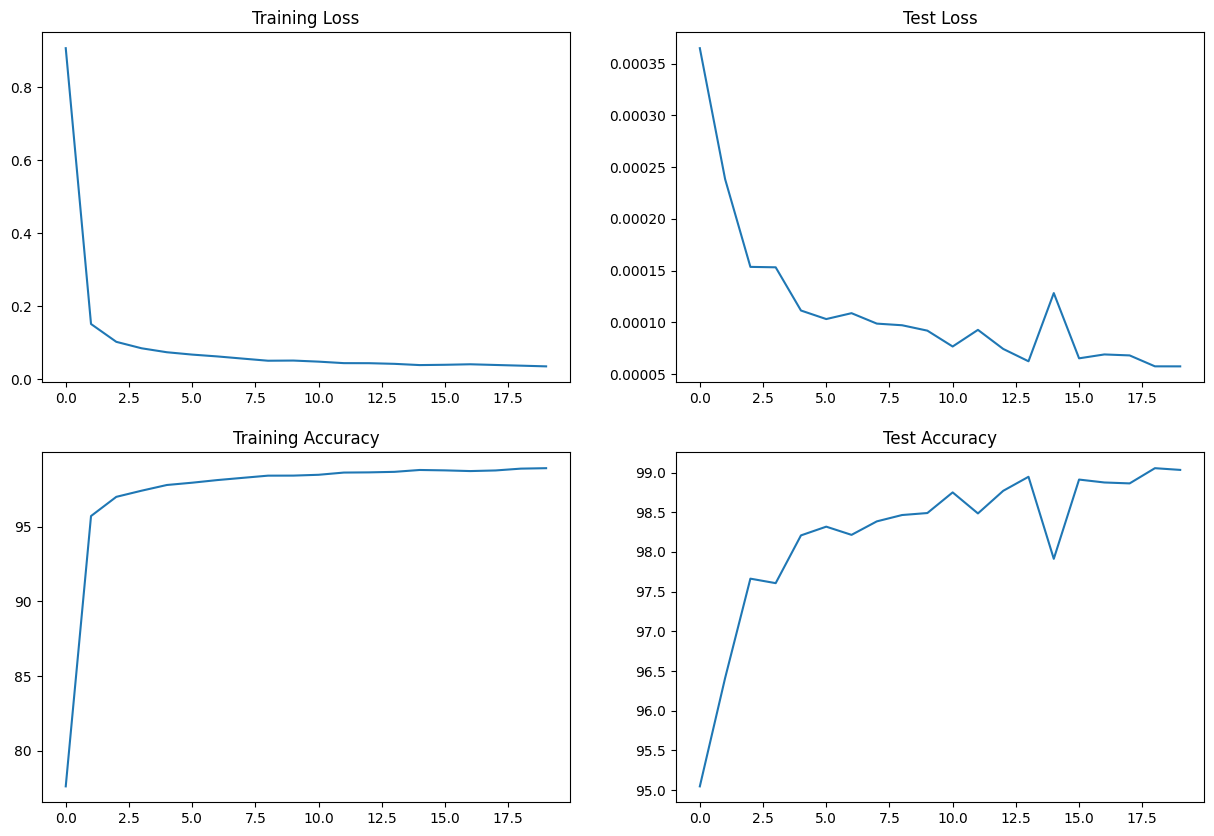

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        #28X28
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3) # 26X26X16
        self.bn1 = nn.BatchNorm2d(16)   # 26x26X16
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3) # 24X24X16
        self.bn2 = nn.BatchNorm2d(16)   # 24X24X16
        self.pool1 = nn.MaxPool2d(2, 2) # 12X12X16
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3) # 10X10X16
        self.bn3 = nn.BatchNorm2d(16)   # 10X10X16
        self.conv4 = nn.Conv2d(16, 16, kernel_size=3) # 8X8X16
        self.bn4 = nn.BatchNorm2d(16)   # 8X8X16
        self.pool2 = nn.MaxPool2d(2, 2) # 4X4X16
        self.conv5 = nn.Conv2d(16, 4, kernel_size=1) # 4X4X4
        self.conv6 = nn.Conv2d(4, 8, kernel_size=3, padding=1) # 4X4X8
        self.bn6 = nn.BatchNorm2d(8)   # 4X4X8
        self.fc1 = nn.Linear(8*4*4, 40)
        self.drop = nn.Dropout(p=0.1)
        self.fc2 = nn.Linear(40, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)), 2)
        x = F.relu(self.bn2(self.conv2(x)), 2)
        x = self.pool1(x)
        x = F.relu(self.bn3(self.conv3(x)), 2)
        x = F.relu(self.bn4(self.conv4(x)), 2)
        x = self.pool2(x)
        x = self.conv5(x)
        x = F.relu(self.bn6(self.conv6(x)), 2)
        x = x.view(-1,8*4*4)
        x = self.drop(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  #scheduler.step()

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
       BatchNorm2d-2           [-1, 16, 26, 26]              32
            Conv2d-3           [-1, 16, 24, 24]           2,320
       BatchNorm2d-4           [-1, 16, 24, 24]              32
         MaxPool2d-5           [-1, 16, 12, 12]               0
            Conv2d-6           [-1, 16, 10, 10]           2,320
       BatchNorm2d-7           [-1, 16, 10, 10]              32
            Conv2d-8             [-1, 32, 8, 8]           4,640
       BatchNorm2d-9             [-1, 32, 8, 8]              64
        MaxPool2d-10             [-1, 32, 4, 4]               0
           Conv2d-11              [-1, 8, 4, 4]             264
           Conv2d-12             [-1, 16, 4, 4]           1,168
      BatchNorm2d-13             [-1, 16, 4, 4]              32
           Conv2d-14             [-1, 1

Train: Loss=0.3006 Batch_id=937 Accuracy=92.56: 100%|██████████| 938/938 [00:26<00:00, 35.30it/s]


Test set: Average loss: 0.0015, Accuracy: 58207/60000 (97.01%)

Epoch 2


Train: Loss=0.0274 Batch_id=937 Accuracy=97.64: 100%|██████████| 938/938 [00:26<00:00, 35.47it/s]


Test set: Average loss: 0.0008, Accuracy: 59019/60000 (98.36%)

Epoch 3


Train: Loss=0.0338 Batch_id=937 Accuracy=98.06: 100%|██████████| 938/938 [00:27<00:00, 34.51it/s]


Test set: Average loss: 0.0007, Accuracy: 59107/60000 (98.51%)

Epoch 4


Train: Loss=0.0245 Batch_id=937 Accuracy=98.37: 100%|██████████| 938/938 [00:26<00:00, 35.42it/s]


Test set: Average loss: 0.0007, Accuracy: 59148/60000 (98.58%)

Epoch 5


Train: Loss=0.0094 Batch_id=937 Accuracy=98.45: 100%|██████████| 938/938 [00:26<00:00, 35.07it/s]


Test set: Average loss: 0.0006, Accuracy: 59235/60000 (98.72%)

Epoch 6


Train: Loss=0.0286 Batch_id=937 Accuracy=98.62: 100%|██████████| 938/938 [00:26<00:00, 34.76it/s]


Test set: Average loss: 0.0006, Accuracy: 59328/60000 (98.88%)

Epoch 7


Train: Loss=0.0087 Batch_id=937 Accuracy=98.68: 100%|██████████| 938/938 [00:26<00:00, 35.40it/s]


Test set: Average loss: 0.0005, Accuracy: 59371/60000 (98.95%)

Epoch 8


Train: Loss=0.0327 Batch_id=937 Accuracy=98.77: 100%|██████████| 938/938 [00:26<00:00, 35.57it/s]


Test set: Average loss: 0.0005, Accuracy: 59423/60000 (99.04%)

Epoch 9


Train: Loss=0.0189 Batch_id=937 Accuracy=98.79: 100%|██████████| 938/938 [00:26<00:00, 35.42it/s]


Test set: Average loss: 0.0004, Accuracy: 59453/60000 (99.09%)

Epoch 10


Train: Loss=0.0090 Batch_id=937 Accuracy=98.88: 100%|██████████| 938/938 [00:26<00:00, 35.28it/s]


Test set: Average loss: 0.0005, Accuracy: 59429/60000 (99.05%)

Epoch 11


Train: Loss=0.0054 Batch_id=937 Accuracy=98.95: 100%|██████████| 938/938 [00:26<00:00, 34.80it/s]


Test set: Average loss: 0.0005, Accuracy: 59413/60000 (99.02%)

Epoch 12


Train: Loss=0.0894 Batch_id=937 Accuracy=98.94: 100%|██████████| 938/938 [00:26<00:00, 35.29it/s]


Test set: Average loss: 0.0004, Accuracy: 59492/60000 (99.15%)

Epoch 13


Train: Loss=0.0028 Batch_id=937 Accuracy=99.00: 100%|██████████| 938/938 [00:26<00:00, 35.15it/s]


Test set: Average loss: 0.0004, Accuracy: 59544/60000 (99.24%)

Epoch 14


Train: Loss=0.0395 Batch_id=937 Accuracy=99.02: 100%|██████████| 938/938 [00:27<00:00, 34.54it/s]


Test set: Average loss: 0.0004, Accuracy: 59490/60000 (99.15%)

Epoch 15


Train: Loss=0.0327 Batch_id=937 Accuracy=99.03: 100%|██████████| 938/938 [00:27<00:00, 34.59it/s]


Test set: Average loss: 0.0004, Accuracy: 59577/60000 (99.30%)

Epoch 16


Train: Loss=0.1911 Batch_id=937 Accuracy=99.35: 100%|██████████| 938/938 [00:26<00:00, 34.88it/s]


Test set: Average loss: 0.0003, Accuracy: 59691/60000 (99.48%)

Epoch 17


Train: Loss=0.0005 Batch_id=937 Accuracy=99.37: 100%|██████████| 938/938 [00:27<00:00, 34.25it/s]


Test set: Average loss: 0.0002, Accuracy: 59708/60000 (99.51%)

Epoch 18


Train: Loss=0.0205 Batch_id=937 Accuracy=99.44: 100%|██████████| 938/938 [00:27<00:00, 34.12it/s]


Test set: Average loss: 0.0002, Accuracy: 59748/60000 (99.58%)

Epoch 19


Train: Loss=0.0044 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:27<00:00, 34.06it/s]


Test set: Average loss: 0.0002, Accuracy: 59726/60000 (99.54%)

Epoch 20


Train: Loss=0.0011 Batch_id=937 Accuracy=99.48: 100%|██████████| 938/938 [00:27<00:00, 34.53it/s]


Test set: Average loss: 0.0002, Accuracy: 59751/60000 (99.58%)



Text(0.5, 1.0, 'Test Accuracy')

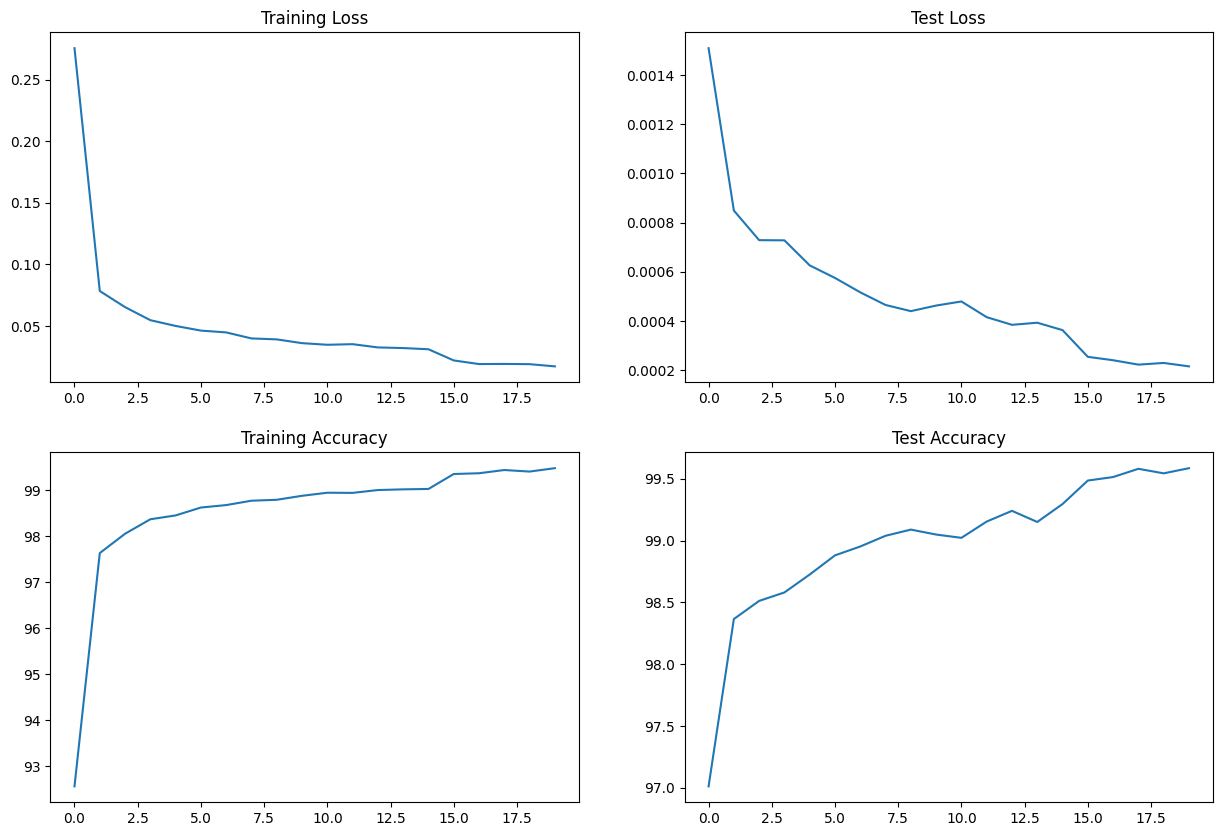

In [10]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        #28X28
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3) # 26X26X16
        self.bn1 = nn.BatchNorm2d(16)   # 26x26X16
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3) # 24X24X16
        self.bn2 = nn.BatchNorm2d(16)   # 24X24X16
        self.pool1 = nn.MaxPool2d(2, 2) # 12X12X16
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3) # 10X10X32
        self.bn3 = nn.BatchNorm2d(16)   # 10X10X32
        self.conv4 = nn.Conv2d(16, 32, kernel_size=3) # 8X8X32
        self.bn4 = nn.BatchNorm2d(32)   # 8X8X32
        self.pool2 = nn.MaxPool2d(2, 2) # 4X4X32
        self.conv5 = nn.Conv2d(32, 8, kernel_size=1) # 4X4X8
        self.conv6 = nn.Conv2d(8, 16, kernel_size=3, padding=1) # 4X4X16
        self.bn6 = nn.BatchNorm2d(16)   # 4X4X16
        self.conv7 = nn.Conv2d(16, 16, kernel_size=3, padding=0) # 2X2X16
        self.bn7 = nn.BatchNorm2d(16)   # 2X2X16
        self.fc1 = nn.Linear(16*2*2, 40)
        self.drop = nn.Dropout(p=0.1)
        self.fc2 = nn.Linear(40, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)), 2)
        x = F.relu(self.bn2(self.conv2(x)), 2)
        x = self.pool1(x)
        x = F.relu(self.bn3(self.conv3(x)), 2)
        x = F.relu(self.bn4(self.conv4(x)), 2)
        x = self.pool2(x)
        x = self.conv5(x)
        x = F.relu(self.bn6(self.conv6(x)), 2)
        x = F.relu(self.bn7(self.conv7(x)), 2)
        x = x.view(-1,16*2*2)
        x = self.drop(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []


!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  scheduler.step()

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")